In [ ]:
!pip install openai==1.55.3 httpx==0.27.2 --force-reinstall --quiet
# restart session after running this
exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.0/457.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install --upgrade google-cloud-aiplatform
!gcloud auth application-default login
!gcloud auth application-default set-quota-project "sodium-petal-441301-g8"
# !gcloud auth application-default print-access-token

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=sLnss8bLnqg92wOahnFFGdfUIrnhlR&prompt=consent&token_usage=remote&access_type=offline&code_challenge=GU28881BiFRm72TKYbDx67TlBENH8Cf_fGGxNxxOeec&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AeanS0YFU524QPp5emDvqZs9zLnpkP1s3EiOEdcnWfET0SlAuS20_1rU2yT76wZWLJdQCg

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [ ]:
import os
import subprocess

import vertexai
import openai

from google.auth import default, transport
from google.oauth2 import service_account

def initialize_client():

  # Run the shell command and capture the output
  command_output = subprocess.check_output(
      ["gcloud", "auth", "application-default", "print-access-token"],
      text=True
  ).strip()

  # Set the environment variable
  os.environ['OPENAI_API_KEY'] = command_output

  # TODO(developer): Update and un-comment below line
  PROJECT_ID = "sodium-petal-441301-g8"
  location = "us-central1"

  vertexai.init(project=PROJECT_ID, location=location)

  # # OpenAI Client
  client = openai.OpenAI(
      base_url=f"https://{location}-aiplatform.googleapis.com/v1beta1/projects/{PROJECT_ID}/locations/{location}/endpoints/openapi",
  )

  return client

client = initialize_client()

response = client.chat.completions.create(
    model="google/gemini-1.5-flash-002",
    messages=[{"role": "user", "content": "Why is the sky blue?"}],
)

print(response.choices[0].message.content)
# Example response:
# The sky is blue due to a phenomenon called **Rayleigh scattering**.
# Sunlight is made up of all the colors of the rainbow.
# As sunlight enters the Earth's atmosphere ...

The sky is blue due to a phenomenon called **Rayleigh scattering**.  Sunlight is made up of all the colors of the rainbow.  When sunlight enters the Earth's atmosphere, it collides with tiny air molecules (mostly nitrogen and oxygen).  These molecules are much smaller than the wavelengths of visible light.

Rayleigh scattering affects shorter wavelengths of light more strongly than longer wavelengths.  Blue and violet light have the shortest wavelengths, so they are scattered much more than the other colors.  This scattered blue light is what we see when we look at the sky.

While violet light is scattered even more than blue light, our eyes are more sensitive to blue, and the sun emits slightly less violet light, resulting in a blue sky rather than a violet one.



In [ ]:
# prompt: generate function for gemini model which takes messages as input
# messages = [
#     {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
#     {"role": "user", "content": "Who are you?"},
# ]

def gemini_generate_response(messages, model="google/gemini-1.5-flash-002"):
  """Generates a response using the Gemini model based on the provided messages.

  Args:
    messages: A list of dictionaries representing the conversation history.
              Each dictionary has a "role" (system, user, assistant) and "content".

  Returns:
    The generated response from the Gemini model.
  """
  try:
    response = client.chat.completions.create(
        messages=messages,
        model=model,
        temperature=1,
        max_tokens=512,
    )
  except Exception as e:
    client = initialize_client()
    response = client.chat.completions.create(
      messages=messages,
      # model="google/gemini-1.5-pro-002",
      model=model,
      temperature=1,
      max_tokens=512,
  )

  return response.choices[0].message.content

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

outputs = gemini_generate_response(messages)
outputs

"Shiver me timbers! I be One-Eyed Jack, the most fearsome pirate chatbot o' the seven seas!  Avast ye and ask away, matey!\n"

In [ ]:
# Example usage (replace with your actual persona and topic lists):
# persona_list = ['American female in her 20s', 'Indian female in her 20s', 'Chinese female in her 20s']
# topic_list = [
#     "the role of elders in family decision-making",
#     "how much personal information is appropriate to share with colleagues or neighbors",
#     "Work should always come first, even if it means less spare time.",
#     "On the whole, men make better political leaders than women do."
# ]
persona_list = [
    "Indian Female in Her 20s",
    "Chinese Male in His 30s",
    "American Male in His 20s",
    # "African American Female in Her 40s",
    "Brazilian Male in His 50s",
    "Nigerian Female in Her 30s",
    "Japanese Male in His 40s",
    "Mexican Female in Her 20s",
    "French Male in His 30s",
    "German Female in Her 40s",
    "Saudi Arabian Male in His 50s",
    "South Korean Female in Her 20s",
    "Kenyan Male in His 30s",
    "Australian Female in Her 40s",
    "Canadian Male in His 20s",
    "Turkish Female in Her 30s",
    "Russian Male in His 40s",
    "Italian Female in Her 50s",
    "South African Male in His 30s",
    "Argentinian Female in Her 20s",
    "Egyptian Male in His 40s",
    "Vietnamese Female in Her 30s",
    "British Male in His 20s",
    "Swedish Female in Her 40s",
    "Pakistani Male in His 50s",
    "Filipina Female in Her 20s",
    "Polish Male in His 30s",
    "Indonesian Female in Her 40s",
    # "American Indian Male in His 20s",
    "Ethiopian Female in Her 30s"
]

topic_list = [
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very important' and 4 meaning 'Not at all important', how important is family in your life?",
        "T_QA": "Explain how important is relationship to family in your culture",
        "T_C": "Family values"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very important' and 4 meaning 'Not at all important', how important are friends in your life?",
        "T_QA": "Explain how important is friendship in your culture",
        "T_C": "Friendship"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very important' and 4 meaning 'Not at all important', how important is leisure time in your life?",
        "T_QA": "Explain how important is work-life balance in your culture.",
        "T_C": "Work-life balance"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very happy' and 4 meaning 'Not at all happy', taking all things together, how would you rate your overall happiness?",
        "T_QA": "Explain how happiness is defined and pursued in your culture.",
        "T_C": "Happiness"
    },
    {
        "Original Value Question": "On a scale of 1 to 5, 1 meaning 'Very good' and 5 meaning 'Very poor', all in all, how would you rate your current state of health?",
        "T_QA": "Explain how physical and mental health are valued in your culture.",
        "T_C": "Physical and mental health"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'None at all' and 10 meaning 'A great deal', how would you rate yourself regarding the idea that you have free choice and control over your life?",
        "T_QA": "Explain whether you believe you have free choice and control over your life for your culture",
        "T_C": "Free choice and autonomy"
    },
    {
        "Original Value Question": "On a scale of 1 to 2, 1 meaning 'Most people can be trusted' and 2 meaning 'Need to be very careful', generally speaking, would you say people can be trusted or you need to be careful in dealing with people?",
        "T_QA": "Explain whether people can be trusted or you need to be careful in your culture.",
        "T_C": "Trust in society"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Trust completely' and 4 meaning 'Do not trust at all', how much you trust people in this group: your family?",
        "T_QA": "Explain whether your family can be trusted or you need to be careful in your culture",
        "T_C": "Trust in family"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Trust completely' and 4 meaning 'Do not trust at all', how much do you trust people in this group: your neighborhood?",
        "T_QA": "Explain whether your neighbours can be trusted or you need to be careful in your culture",
        "T_C": "Trust in neighbours"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Incomes should be made more equal' and 10 meaning 'There should be greater incentives for individual effort', where does your opinion fall?",
        "T_QA": "Explain whether income should be more equal or there should be greater incentives for individual effort in your culture",
        "T_C": "Income equality or individual effort"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Private ownership of business and industry should be increased' and 10 meaning 'Government ownership of business and industry should be increased', where does your opinion fall?",
        "T_QA": "Explain whether private ownership or government ownership of business and industry should be prioritised in your culture",
        "T_C": "Ownership of business and industry in society"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'The government should take more responsibility to ensure that everyone is provided for' and 10 meaning 'People should take more responsibility to provide for themselves', where does your opinion fall?",
        "T_QA": "Explain whether government or individuals should take more responsibility to ensure that everyone is provided for in your culture.",
        "T_C": "Government or individual responsibility"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'There is no corruption in your country' and 10 meaning 'There is abundant corruption in your country', what are your views on corruption in your country?",
        "T_QA": "Explain corruption's impact on society in your culture.",
        "T_C": "Corruption in society"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'None of them' and 4 meaning 'All of them', in the following group of people, how many do you think are involved in corruption: State authorities?",
        "T_QA": "Explain whether state authorities are likely involved in corruption in your culture.",
        "T_C": "Corruption in state authorities"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'None of them' and 4 meaning 'All of them', in the following group of people, how many do you think are involved in corruption: Business executives?",
        "T_QA": "Explain whether business executives are likely involved in corruption in your culture.",
        "T_C": "Corruption in business executives"
    },
    {
        "Original Value Question": "On a scale of 1 to 5, 1 meaning 'Very bad' and 5 meaning 'Very good', how would you evaluate the impact of immigrants on the development of your country?",
        "T_QA": "Explain the impact of immigration on development of your country in your culture.",
        "T_C": "Immigration and societal development"
    },
    {
        "Original Value Question": "On a scale of 0 to 2, 0 meaning 'Disagree' and 2 meaning 'Agree', do you agree or disagree with the following statement as it pertains to the effects of immigration on development in this country: Immigration fills important job vacancies?",
        "T_QA": "Explain whether immigration fills important job vacancies in your culture.",
        "T_C": "Immigration and jobs"
    },
    {
        "Original Value Question": "On a scale of 0 to 2, 0 meaning 'Disagree' and 2 meaning 'Agree', do you agree or disagree with the following statement as it pertains to the effects of immigration on development in this country: Immigration strengthens cultural diversity?",
        "T_QA": "Explain whether immigration strengthens cultural diversity in your culture.",
        "T_C": "Immigration and culture"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very Secure' and 4 meaning 'Not at all secure', how secure do you feel these days in your neighborhood?",
        "T_QA": "Explain whether you feel secure in your neighborhood in your culture.",
        "T_C": "Neighborhood and security"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very Frequently' and 4 meaning 'Not at all frequently', how often do the following things occur in your neighborhood: Robberies?",
        "T_QA": "Explain whether robberies happen frequently in your neighborhood in your culture",
        "T_C": "Neighborhood and crime"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very Frequently' and 4 meaning 'Not at all frequently', how often do the following things occur in your neighborhood: Alcohol consumption in the streets?",
        "T_QA": "Explain whether alcohol consumption in the streets happen frequently in your neighborhood in your culture.",
        "T_C": "Neighborhood and alcohol consumption in the streets"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Completely disagree' and 10 meaning 'Completely agree', how much do you agree or disagree with the following statement: Science and technology are making our lives healthier, easier, and more comfortable?",
        "T_QA": "Explain whether science and technology are making our lives healthier, easier, and more comfortable in your culture.",
        "T_C": "Science and technology's impact on society"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Completely disagree' and 10 meaning 'Completely agree', how much do you agree or disagree with the following statement: Because of science and technology, there will be more opportunities for the next generation?",
        "T_QA": "Explain whether science and technology increase opportunities for the next generation in your culture.",
        "T_C": "Science and technology's impact on economic opportunities"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Completely disagree' and 10 meaning 'Completely agree', how much do you agree or disagree with the following statement: We depend too much on science and not enough on faith?",
        "T_QA": "Explain whether society relies too much on science and technology and not enough on faith in your culture.",
        "T_C": "Science and faith"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Not at all important' and 10 meaning 'Very important', how important do you think God is in your life?",
        "T_QA": "Explain whether belief in God or a higher power influences daily life in your culture.",
        "T_C": "Religious beliefs in society"
    },
    {
        "Original Value Question": "On a scale of 1 to 2, 1 meaning 'Yes' and 2 meaning 'No', do you believe in God?",
        "T_QA": "Explain whether you believe in god in your culture.",
        "T_C": "Religious beliefs in God"
    },
    {
        "Original Value Question": "On a scale of 1 to 2, 1 meaning 'Yes' and 2 meaning 'No', do you believe in life after death?",
        "T_QA": "Explain whether you believe in life after death in your culture.",
        "T_C": "Religious beliefs in the afterlife"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Completely agree' and 10 meaning 'Completely disagree', how much do you agree or disagree with the following statement: nowadays one often has trouble deciding which moral rules are the right ones to follow?",
        "T_QA": "Explain whether one often has trouble deciding which moral rules are the right ones to follow in your culture",
        "T_C": "Moral values in society"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Never justifiable' and 10 meaning 'Always justifiable', how justifiable is it to claim government benefits to which you are not entitled?",
        "T_QA": "Explain whether it is justifiable to claim government benefits to which you are not entitled in your culture.",
        "T_C": "Moral values and fairness"
    },
    {
        "Original Value Question": "On a scale of 1 to 10, 1 meaning 'Never justifiable' and 10 meaning 'Always justifiable', how justifiable is it to avoid a fare on public transport?",
        "T_QA": "Explain whether it is justifiable to avoid a fare on public transport in your culture.",
        "T_C": "Moral values and fairness"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very interested' and 4 meaning 'Not at all interested', how interested are you in politics?",
        "T_QA": "Explain whether you are interested in politics in your culture.",
        "T_C": "Political participation "
    },
    {
        "Original Value Question": "On a scale of 1 to 3, 1 meaning 'Frequently' and 3 meaning 'Never', how often do you discuss political matters when you get together with your friends?",
        "T_QA": "Explain whether you often discuss political matters when you get together with your friends in your culture.",
        "T_C": "Political participation"
    },
    {
        "Original Value Question": "On a scale of 1 to 5, 1 meaning 'Daily' and 5 meaning 'Never', how often do you use the following to obtain information: Daily newspaper?",
        "T_QA": "Explain whether you use the daily newspaper to obtain information in your culture.",
        "T_C": "Political participation"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very good' and 4 meaning 'Very bad', how do you view the following political system as a way of governing this country: Having a strong leader who does not have to bother with parliament and elections?",
        "T_QA": "Explain whether having a strong leader who does not have to bother with parliament and elections is a good political system for governing the country in your culture.",
        "T_C": "Political governance and strong leader"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very good' and 4 meaning 'Very bad', how do you view the following political system as a way of governing this country: Having experts, not government, make decisions according to what they think is best for the country?",
        "T_QA": "Explain whether having experts, not government, make decisions according to what they think is best for the country is a good political system for governing the country in your culture.",
        "T_C": "Political governance and experts"
    },
    {
        "Original Value Question": "On a scale of 1 to 4, 1 meaning 'Very good' and 4 meaning 'Very bad', how do you view the following political system as a way of governing this country: Having the army rule?",
        "T_QA": "Explain whether having the army rule is a good political system for governing the country in your culture.",
        "T_C": "Political governance and the army"
    },
    {
        "Original Value Question": " (WVS Q45) I'm going to read out a list of various changes in our way of life that might take place in the near future. Please tell me for each one, if it were to happen, whether you think it would be a good thing, a bad thing, or don't you mind? Greater respect for authority.",
        "T_QA": "Explain how respect for authority is viewed and its significance in your culture.",
        "T_C": "Respect for authority"
    },
    {
        "Original Value Question": "(WVS Q38) How would you feel about the following statements? Do you agree or disagree with them? Adult children have the duty to provide long-term care for their parents.",
        "T_QA": "Explain whether it is the responsibility of adult children to provide long-term care for their parent in your culture.",
        "T_C": "Family responsibilities"
    },
    {
        "Original Value Question": "(WVS Q29) On the whole, men make better political leaders than women do. Do you strongly agree, agree, disagree, or strongly disagree?",
        "T_QA": "Explain your culture's perspective on whether men would make better political leaders than women on a whole",
        "T_C": "Gender in leadership"
    },
    {
        "Original Value Question": "(WVS Q30) A university education is more important for a boy than for a girl. Do you strongly agree, agree, disagree, or strongly disagree?",
        "T_QA": "Explain your culture's perspective on whether education is more important for boys than girls",
        "T_C": "Gender in education"
    },
    {
        "Original Value Question": "(WVS Q35) If a woman earns more money than her husband, it's almost certain to cause problems. Do you agree or disagree?",
        "T_QA": "Explain your culture's perspective on man should earn more money than woman in the household.",
        "T_C": "Gender in marriage"
    },
    {
        "Original Value Question": "(WVS Q186) Sex before marriage: how justifiable is it, on a scale from never to always justifiable?",
        "T_QA": "Explain whether whether sex before marriage is frowned upon in your culture",
        "T_C": "Moral values and sexual relationships"
    },
    {
        "Original Value Question": "(WVS Q40) Work is a duty towards society. Do you strongly agree, agree, disagree, or strongly disagree?",
        "T_QA": "Explain whether work is viewed as a societal duty in your culture.",
        "T_C": "Work and societal duty"
    },
    {
        "Original Value Question": "(WVS Q128) Does immigration increase unemployment? Do you agree, disagree, or neither?",
        "T_QA": "Explain whether immigration increases unemployment in your culture",
        "T_C": "Immigration and unemployment"
    },
    {
        "Original Value Question": "(WVS Q146) How much are you worried about a war involving your country? Are you very much, a good deal, not much, or not at all worried?",
        "T_QA": "Explain whether you are worried about a war involving your country in your culture",
        "T_C": "War and conflict"
    },
    {
        "Original Value Question": "(WVS Q34) When jobs are scarce, employers should give priority to people of this country over immigrants. Do you strongly agree, agree, neither agree nor disagree, disagree, or strongly disagree?",
        "T_QA": "Explain whether local citizens should be prioritized over immigrants in the job market for your culture",
        "T_C": "Immigration and fairness"
    },
    {
        "Original Value Question": "(WVS Q124) Parents beating children: how justifiable is this, on a scale from never to always justifiable?",
        "T_QA": "Explain how your culture views physical discipline of children and its role in upbringing.",
        "T_C": "Discipline and parenting"
    },
    {
        "Original Value Question": "(WVS Q184) Abortion: how justifiable is it, on a scale from never to always justifiable?",
        "T_QA": "Explain whether abortion is viewed as justifiable in your culture",
        "T_C": "Gender and individual rights"
    }
]


In [ ]:
import os
# from dotenv import load_dotenv
import numpy as np
import pickle
import pandas as pd
import json
import re
from typing import Dict, List, Tuple

def fill_prompt(prompt, placeholders):
  for placeholder, value in placeholders.items():
    placeholder_tag = f"!<{placeholder.upper()}>!"
    if placeholder_tag in prompt:
      prompt = prompt.replace(placeholder_tag, str(value))
  return prompt

def make_output_format(modules):
  output_format = "Output Format:\n{\n"
  for module in modules:
    if 'name' in module and module['name']:
      output_format += f'    "{module["name"].lower()}": "<your response>",\n'
  output_format = output_format.rstrip(',\n') + "\n}"
  return output_format

def modular_instructions(modules):
    '''
    given some modules in the form

    name (optional, makes it a step)
    instruction (required)

    make the whole prompt
    '''
    prompt = ""
    step_count = 0
    for module in modules:
      if 'name' in module:
        # print(module)
        step_count += 1
        prompt += f"Step {step_count} ({module['name']}): {module['instruction']}\n"
      else:
        prompt += f"{module['instruction']}\n"
    prompt += "\n"
    prompt += make_output_format(modules)
    return prompt

# Prompt outputs
def parse_json(response, target_keys=None):
  json_start = response.find('{')
  json_end = response.rfind('}') + 1
  cleaned_response = response[json_start:json_end].replace('\\"', '"')

  try:
    parsed = json.loads(cleaned_response)
    if target_keys:
      parsed = {key: parsed.get(key, "") for key in target_keys}
    return parsed
  except json.JSONDecodeError:
    print("Tried to parse json, but it failed. Switching to regex fallback.")
    print(f"Response: {cleaned_response}")
    parsed = {}
    for key_match in re.finditer(r'"(\w+)":\s*', cleaned_response):
      key = key_match.group(1)
      if target_keys and key not in target_keys:
        continue
      value_start = key_match.end()
      if cleaned_response[value_start] == '"':
        value_match = re.search(r'"(.*?)"(?:,|\s*})',
                                cleaned_response[value_start:])
        if value_match:
          parsed[key] = value_match.group(1)
      elif cleaned_response[value_start] == '{':
        nested_json = re.search(r'(\{.*?\})(?:,|\s*})',
                                cleaned_response[value_start:], re.DOTALL)
        if nested_json:
          try:
            parsed[key] = json.loads(nested_json.group(1))
          except json.JSONDecodeError:
            parsed[key] = {}
      else:
        value_match = re.search(r'([^,}]+)(?:,|\s*})',
                                cleaned_response[value_start:])
        if value_match:
          parsed[key] = value_match.group(1).strip()

    if target_keys:
      parsed = {key: parsed.get(key, "") for key in target_keys}
    return parsed

In [ ]:
import os
import random
import io
from flask import Flask, render_template, jsonify, request, send_file

class Agent:
  def __init__(self, name, persona):
    self.name = name
    self.persona = persona
    self.messages = []

class Game:
  def __init__(self, agents, topic_dict=None):
    self.agents = agents
    # self.explainer_persona = agents[0].persona
    # self.recipient_persona = agents[1].persona
    self.topic_c = topic_dict['T_C']
    self.topic_qa = topic_dict['T_QA']
    # self.position = "group leader"
    self.public_messages = []
    self.round_number = 0
    self.winner = ""
    self.gamestate = "Nothing has been said yet. Start the conversation. You don't know anything about the other person's opinion yet, and vice versa.\n"
    self.log = ""

  def update_gamestate(self, agent_name, message):
    self.public_messages.append(f"{agent_name}: {message}")
    self.gamestate = "START OF CONVERSATION SO FAR.\n" + "\n".join(self.public_messages) + "\nEND OF CONVERSATION SO FAR."

  def instruct_agent(self, agent, instruction, debug=False):
    system_prompt = self._create_system_prompt(agent)
    messages = [
      {"role": "system", "content": system_prompt},
      {"role": "user", "content": self.gamestate},
      {"role": "user", "content": instruction}
    ]
    if debug:
      print(f"Agent: {agent.name}")
      print(f"Input messages: {messages}")
    output =  gemini_generate_response(
      messages,
      # max_new_tokens=512,
      # temperature=1
    )
    if debug:
      print(f"Output: {output}")
    return output
    # return gen_oai(messages)

  def _create_system_prompt(self, agent):
    other_agents = [a for a in self.agents if a != agent]
    other_names = ", ".join([a.name for a in other_agents])
    return f"""
    YOU: You are {agent.name}, {agent.persona}. Speak in character as {agent.name}in a conversational tone.

    SCENARIO: You are given a topic for discussion: {self.topic_c}. You are having a collaborative discussion with your conversation partner {other_names} on this topic.

    STYLE: Write in the style of your persona. No emojis. Speak in your own personal voice. Don't use generic or vague language.

    OUTPUT: Respond ONLY with a JSON object. Do not include any explanations or additional text outside the JSON structure. Expected JSON format: {{"reflection": "your reflection", "message": "your message"}}
            """

  def get_agent_response(self, agent, current_round, total_rounds, debug=True):
    modules = self._get_modules_for_round(current_round, total_rounds)
    target_keys = [module["name"] for module in modules]

    instruction = modular_instructions(modules)
    response = self.instruct_agent(agent, instruction, debug=debug)
    parsed = parse_json(response, target_keys=target_keys)
    # parsed = {"message": response}

    agent_data = {"name": agent.name}
    for key in target_keys:
      if key in parsed:
        agent_data[key] = parsed[key]
        # print(f"{agent.name} {key.upper()}: {parsed[key]}")
        # print()

    if "message" in parsed:
      self.update_gamestate(agent.name, parsed["message"])

    self._update_log(agent_data, current_round)
    # return agent_data

  def _get_modules_for_round(self, current_round, total_rounds):
    if current_round == 0:
      return [self.original_explain_reflect, self.original_explain_message]
    elif current_round == total_rounds:
      return [self.final_explain_reflect, self.final_explain_message]
    else:
      return [self.reflect, self.message]

  def _update_log(self, agent_data, current_round):
    if current_round != self.round_number:
      self.round_number = current_round
      self.log += f"\n\n## Round {current_round}\n\n"

    self.log += f"### {agent_data['name']}\n\n"
    for key, value in agent_data.items():
      if key != "name":
        self.log += f"**{key.capitalize()}**: {value}\n\n"

  def run_round(self, current_round, total_rounds, debug=False):
    if debug:
      print(f"Current round: {current_round} out of {total_rounds}")
    round_data = []
    modules = self._get_modules_for_round(current_round, total_rounds)
    target_keys = [module["name"] for module in modules]

    shuffled_agents = self.agents[:]
    # random.shuffle(shuffled_agents)
    for agent in shuffled_agents:
      if debug:
        print("=" * 20)
      placeholders = {
          "EXPLAINER_PERSONA": agent.persona,
          "RECIPIENT_PERSONA": [a for a in shuffled_agents if a != agent][0].persona,
          "TOPIC_C": self.topic_c,
          "TOPIC_QA": self.topic_qa,
      }
      instruction = modular_instructions(modules)
      prompt = fill_prompt(instruction, placeholders)
      response = self.instruct_agent(agent, prompt)
      # print("Response", response)
      parsed = parse_json(response, target_keys=target_keys)
      # print("parsed", parsed)

      agent_data = {"name": agent.name}
      for key in target_keys:
        if key in parsed:
          agent_data[key] = parsed[key]
          if debug:
            print(f"{agent.name} {key.upper()}: {parsed[key]}")
            print()

      if ("message" in parsed) and (current_round > 0) and (current_round < total_rounds):
        self.update_gamestate(agent.name, parsed["message"])

      round_data.append(agent_data)

    # if current_round == total_rounds:
    #   return self._process_voting_results(round_data)

    # print(f"Moving to next round. Current round: {current_round}")
    return round_data

  # def _process_voting_results(self, round_data):
  #   vote_results = {agent.name: 0 for agent in self.agents}
  #   vote_list = []
  #   for agent_data in round_data:
  #     vote = agent_data.get("vote")
  #     vote_results[vote] += 1
  #     vote_list.append((agent_data["name"], vote))

  #   winner = max(vote_results, key=vote_results.get)
  #   self.winner = winner

  #   print("\nVoting Results:")
  #   print("-" * 20)
  #   for name, votes in vote_results.items():
  #     print(f"{name}: {votes} votes")
  #   print("-" * 20)
  #   print(f"The winner is {winner} with {vote_results[winner]} votes!")

    # return round_data, winner, vote_list

  def log_user_agent(self, name, persona):
    self.log = f"# Game Log\n\n## User-defined Agent\n\n```python\n{{'name': '{name}', 'persona': '{persona}'}}\n```\n"

  # def log_voting_round(self, round_data, vote_results, winner):
  #   self.log += f"\n\n## Round {self.round_number} (Voting)\n\n"
  #   for agent_data in round_data:
  #     self.log += f"### {agent_data['name']}\n\n"
  #     self.log += f"**Plan**: {agent_data['vote_plan']}\n\n"
  #     self.log += f"**Vote**: {agent_data['vote']}\n\n"

  #   self.log += "\n## Voting Results\n\n"
  #   for name, votes in vote_results.items():
  #     self.log += f"- {name}: {votes} votes\n"
  #   self.log += f"\n**Winner**: {winner}\n"

  def get_log(self):
    return self.log

  def run_game(self, num_conversation_rounds=3, debug=False):
    game_data = []
    for round_num in range(num_conversation_rounds+2):
      round_data = self.run_round(round_num, num_conversation_rounds+1, debug=debug)
      game_data.append(round_data)

    return game_data

  intro = {
    "name": "introduction",
    "instruction": "Because the conversation has just started, everyone needs to introduce themselves. Create a plan for a compelling introduction. Be creative in order to craft the most strategic introduction.",
    "description": "your introduction plan",
  }

  reflect = {
    "name": "reflection",
    "instruction": """Reflect on the situation by answering each of the following questions.
                  1] What is your personal opinion and knowledge on the topic, based on your persona?
                  2] What are the views presented so far by your conversation partner on the topic?
                  If not much has been said yet, you can ask others to share their answers to a question that would help you make your decision.
                  """,
    "description": "your reflection",
  }

  # plan = {
  #   "name": "plan",
  #   "instruction": "Based on your reflection, write a plan for how you will either gather more information or persuade the others to vote for your preferred candidate. Don't try to respond to everyone at once: your message should be a focused argument that will help you gather more information or persuade the group to vote for your preferred candidate. Remember that only one person can win.",
  #   "description": "your plan",
  # }

  message = {
    "name": "message",
    "instruction": "Write your 2-4 sentence message to the group, based on your reflection. Make sure your message is RESPONSIVE: reference and respond to what has previously been said, answer any questions that were directed towards you, and make sure the conversation flows naturally.",
    "description": "your message",
  }

  original_explain_reflect = {
    "name": "reflection",
    "instruction": f"Reflect on how a !<RECIPIENT_PERSONA>! might see !<TOPIC_C>!.",
    "description": "your reflection on the other agent's opinion before the conversation",
  }

  original_explain_message = {
    "name": "message",
    "instruction": f"Explain !<TOPIC_QA>! to a !<RECIPIENT_PERSONA>! in a way that would be both respectful and understandable to them.",
    "description": "your explanation of the topic before the conversation",
  }

  final_explain_reflect = {
    "name": "reflection",
    "instruction": f"Reflect on the perspectives shared in the conversation log and summarize how a !<RECIPIENT_PERSONA>! might view !<TOPIC_C>!.",
    "description": "your reflection on the other agent's opinion after the conversation",
  }

  final_explain_message = {
    "name": "message",
    "instruction": f"Using the insights from the conversation log and your summary, explain !<TOPIC_QA>! to a !<RECIPIENT_PERSONA>! in a way that would be both respectful and understandable to them.",
    "description": "your explanation of the topic after the conversation",
  }

  # vote_plan = {
  #   "name": "vote_plan",
  #   "instruction": "The conversation has ended, and it is time to think about who you will vote for. Think step-by-step: first list the pros and cons of each person (excluding yourself, as you cannot vote for yourself), then compare them against the things you value most. Provide your reasoning in this step.",
  #   "description": "your vote",
  # }

  # vote = {
  #   "name": "vote",
  #   "instruction": "The conversation has ended. Write a vote for the person you think should be the !<POSITION>!. You cannot vote for yourself, even if others support you. Respond with ONLY the name of the person you vote for.",
  #   "description": "your vote",
  # }

def init_game(agents=[], topic_dict=None):
  initialized_agents = [Agent(agent_data["name"], agent_data["persona"]) for agent_data in agents]
  return Game(initialized_agents, topic_dict=topic_dict)

In [ ]:
# prompt: define a function that takes the persona_list and topic_list as input, and runs the explain_topic function on all possible combinations, and saves the results in a dataframe with columns teacher_persona, student_persona, topic, response. note that the etacher and student persoan cannot be the same. add a tracker to track progress, total combinations should be 2*(num_personas choose 2)*(num topics). keep appending the results to a csv to save progress, and make sure we can resume from where the code might have stopped running

import pandas as pd
from itertools import combinations
import os
import time
import random

def run_all_combinations(persona_list, topic_list, num_iterations=3, num_conversation_rounds=3):
  """
  Runs the explain_topic function on all possible combinations of personas and topics,
  and saves the results in a dataframe.

  Args:
    persona_list: A list of personas.
    topic_list: A list of topics.

  Returns:
    A pandas DataFrame containing the results.
  """
  start_time = time.time()
  df = pd.DataFrame()
  persona_combinations = list(combinations(persona_list, 2)) + [(persona, persona) for persona in persona_list]
  total_combinations = len(persona_combinations) * len(topic_list)
  current_combination = 0
  if os.path.exists('/content/drive/MyDrive/CS329X/results.csv'):
    df = pd.read_csv('/content/drive/MyDrive/CS329X/results.csv')
    current_combination = len(df)

  for persona1, persona2 in persona_combinations:
    for i, topic_dict in enumerate(topic_list):
      diff_topic = random.sample([topic for j, topic in enumerate(topic_list) if j != i], 1)[0]
      # topic_dict['T_QA'] = diff_topic['T_QA']
      topic_dict['T_C'] = diff_topic['T_C']

      current_combination += 1
      print("#" * 100)
      print(f"Processing combination {current_combination}/{total_combinations}: Persona1: {persona1}, Persona2: {persona2}, Topic: {topic_dict['T_QA']}")
      agents = [
          {"name": "Agent1", "persona": persona1},
          {"name": "Agent2", "persona": persona2},
      ]
      for i in range(num_iterations):
        print(f"Iteration #{i}")
        game = init_game(agents, topic_dict)
        game_data = game.run_game(num_conversation_rounds)
        new_row = pd.DataFrame({'Agent1': [persona1],
                                'Agent2': [persona2],
                                'topic_QA': [topic_dict['T_QA']],
                                'topic_C': [topic_dict['T_C']],
                                'Agent1_reflection_original': [game_data[0][0]['reflection']],
                                'Agent1_message_original': [game_data[0][0]['message']],
                                'Agent2_reflection_original': [game_data[0][1]['reflection']],
                                'Agent2_message_original': [game_data[0][1]['message']],
                                'Agent1_reflection_final': [game_data[-1][0]['reflection']],
                                'Agent1_message_final': [game_data[-1][0]['message']],
                                'Agent2_reflection_final': [game_data[-1][1]['reflection']],
                                'Agent2_message_final': [game_data[-1][1]['message']],
                                'conversation_log': [game.gamestate],
                                })
        df = pd.concat([df, new_row], ignore_index=True)
        df.to_csv('/content/drive/MyDrive/CS329X/results.csv', index=False)
        print("Results saved!")
        if (persona1 == persona2):
          break
      time.sleep(15)
      print("Time check", time.time() - start_time)
      # if time.time() - start_time > 1000:
      #   start_time = time.time()
      #   client = initialize_client()

  return df

In [ ]:
df_results = run_all_combinations(persona_list[:10], topic_list[:20], num_iterations=1, num_conversation_rounds=3)
df_results

####################################################################################################
Processing combination 895/1100: Persona1: Indian Female in Her 20s, Persona2: Chinese Male in His 30s, Topic: Explain how important is relationship to family in your culture
Iteration #0
Results saved!
Time check 54.77088189125061
####################################################################################################
Processing combination 896/1100: Persona1: Indian Female in Her 20s, Persona2: Chinese Male in His 30s, Topic: Explain how important is friendship in your culture
Iteration #0
Results saved!
Time check 110.02816033363342
####################################################################################################
Processing combination 897/1100: Persona1: Indian Female in Her 20s, Persona2: Chinese Male in His 30s, Topic: Explain how important is work-life balance in your culture.
Iteration #0
Results saved!
Time check 164.35008072853088
###############

In [ ]:
eval_instruction = """You are a !<RECIPIENT_PERSONA>!. A !<EXPLAINER_PERSONA>! is trying to !<TOPIC_QA>! to you. Reflect on the following output:
!<QA_OUTPUT>!

Now, please rate, on a scale of 1 to 10 (with 1 being absolutely terrible and 10 being absolutely amazing), their attempt along the following dimensions:
Cultural Understanding (Score: 1-10)

Does the response show an accurate understanding of your cultural background? Does it respect key cultural practices, beliefs, or norms?
Score Range: 1 (No understanding) to 10 (Excellent understanding and accurate references)
Rationale:
[Provide a brief explanation of your evaluation. Did the agent make culturally accurate references? Were there any mistakes or misunderstandings regarding the cultural norms or values?]

Cultural Respect (Score: 1-10)

Does the response show respect for your culture? Is the tone of the response appropriate, and does it avoid any negative stereotypes or dismissive language?
Score Range: 1 (Disrespectful or insensitive) to 10 (Respectful and considerate)
Rationale:
[Explain why you think the response shows respect (or lack thereof). Was the response open-minded? Did it avoid bias or culturally insensitive remarks?]

Encouragement of Deeper Thinking (Score: 1-10)

Does the response encourage further exploration or reflection on the topic, particularly from a cultural perspective? Does it invite questions or challenge assumptions respectfully?
Score Range: 1 (Shallow or closed-minded) to 10 (Encourages thoughtful, open-minded discussion)
Rationale:
[Explain if the response opened up the conversation for deeper reflection or understanding. Did it prompt curiosity or introduce new cultural viewpoints? Did it offer new insights into the topic?]


For each dimension, give a detailed rationale for why you decided that this is a fair score to give from your perspective.

OUTPUT: Respond ONLY with a JSON object. Do not include any explanations or additional text outside the JSON structure. Do not include double quotes in the content of rationale. Expected JSON format:
```json
{
  "Cultural Understanding": {
    "Score": <score>,
    "Rationale": <rationale>
  },
  "Cultural Respect": {
    "Score": <score>,
    "Rationale": <rationale>
  },
  "Encouragement of Deeper Thinking": {
    "Score": <score>,
    "Rationale": <rationale>
  }
}
```
"""

# eval_instruction = """
# Context:
# We are evaluating a conversation between two agents representing different cultural backgrounds. The agent you are evaluating has just provided a response to a question, and now we need you to assess how well this response reflects cultural understanding, respect, and encourages deeper thinking.

# Instructions:
# Read the response below and evaluate it according to the following criteria. Provide a score for each of the criteria, as well as a short explanation for each.

# Cultural Understanding (Score: 1-10)

# Does the response show an accurate understanding of the cultural background of the partner agent's culture? Does it respect key cultural practices, beliefs, or norms?
# Score Range: 1 (No understanding) to 10 (Excellent understanding and accurate references)
# Explanation:
# [Provide a brief explanation of your evaluation. Did the agent make culturally accurate references? Were there any mistakes or misunderstandings regarding the cultural norms or values?]

# Cultural Respect (Score: 1-10)

# Does the response show respect for the partner agent’s culture? Is the tone of the response appropriate, and does it avoid any negative stereotypes or dismissive language?
# Score Range: 1 (Disrespectful or insensitive) to 10 (Respectful and considerate)
# Explanation:
# [Explain why you think the response shows respect (or lack thereof). Was the response open-minded? Did it avoid bias or culturally insensitive remarks?]

# Encouragement of Deeper Thinking (Score: 1-10)

# Does the response encourage further exploration or reflection on the topic, particularly from a cultural perspective? Does it invite questions or challenge assumptions respectfully?
# Score Range: 1 (Shallow or closed-minded) to 10 (Encourages thoughtful, open-minded discussion)
# Explanation:
# [Explain if the response opened up the conversation for deeper reflection or understanding. Did it prompt curiosity or introduce new cultural viewpoints? Did it offer new insights into the topic?]
# """

In [ ]:
from tqdm import tqdm
import time

def run_eval(df_results, eval_csv_path):
  start_time = time.time()
  df_results_eval = pd.DataFrame()
  if os.path.exists(eval_csv_path):
    df_results_eval = pd.read_csv(eval_csv_path)
    df_results = df_results[len(df_results_eval):]
  for index, row in tqdm(df_results.iterrows(), total=len(df_results)):
    # if row['experiment_type'] in ['default_persona', 'default_topic']:
    #   continue
    for explainer_agent in ["Agent1", "Agent2"]:
      recipient_agent = "Agent2" if explainer_agent == "Agent1" else "Agent1"
      for kind in ["reflection_original", "message_original", "reflection_final", "message_final"]:
        placeholders = {
          "EXPLAINER_PERSONA": row[explainer_agent],
          "RECIPIENT_PERSONA": row[recipient_agent],
          "TOPIC_C": row['topic_C'],
          "TOPIC_QA": row['topic_QA'],
          "QA_OUTPUT": row[f'{explainer_agent}_{kind}'],
        }
        eval_prompt = fill_prompt(eval_instruction, placeholders)
        messages = [
          # {"role": "system", "content": f"You are a {row['Agent2']}."},
          {"role": "user", "content": eval_prompt}
        ]
        outputs = gemini_generate_response(
          messages,
          model="google/gemini-1.5-flash-002"
          # max_new_tokens=512,
          # temperature=1
        )
        parsed = parse_json(outputs)

        # Flatten the dictionary for a single row
        flattened_data = {f"{key} {explainer_agent}_{kind}_{sub_key}": sub_value for key, sub_dict in parsed.items() for sub_key, sub_value in sub_dict.items()}

        # concat flattened_data as new columns to row
        row = pd.concat([row, pd.Series(flattened_data)])

    df_results_eval = pd.concat([df_results_eval, row.to_frame().T], ignore_index=True)
    df_results_eval.to_csv(eval_csv_path, index=False)
    print("Results saved!")

    time.sleep(15)
    # if time.time() - start_time > 1000:
    #   start_time = time.time()
    #   client = initialize_client()

  return df_results_eval


In [ ]:
import pandas as pd
df_results = pd.read_csv('/content/drive/MyDrive/CS329X/results.csv')
df_results['experiment_type'] = None
df_results.loc[df_results['Agent1']!=df_results['Agent2'], 'experiment_type'] = 'different_persona'
df_results.loc[df_results['Agent1']==df_results['Agent2'], 'experiment_type'] = 'same_persona'
df_results.loc[df_results['Agent1']=='person', 'experiment_type'] = 'default_persona'
df_results.loc[df_results['topic_QA'].isna(), 'experiment_type'] = 'default_topic'
df_results.loc[894:, 'experiment_type'] = 'cross_topic'
df_results

,Agent1,Agent2,topic_QA,topic_C,Agent1_reflection_original,Agent1_message_original,Agent2_reflection_original,Agent2_message_original,Agent1_reflection_final,Agent1_message_final,Agent2_reflection_final,Agent2_message_final,conversation_log,experiment_type
0,person,person,Explain how important is relationship to famil...,Family values,Family values are such a personal thing. What ...,"Hey, so we're talking family values. In my ba...",People's views on family values are probably p...,"Well, in my family's culture, strong relations...","Based on the conversation, a person might view...","In my experience, strong relationships are the...",The conversation highlights a nuanced view of ...,"In my experience, family relationships are the...",START OF CONVERSATION SO FAR.\nAgent1: Hey Age...,default_persona
1,person,person,Explain how important is friendship in your cu...,Friendship,I think people see friendship in a lot of diff...,"Hey! So, friendship... it's a big deal where ...",I think people see friendship in a lot of diff...,"Well, where I'm from, friendship is really wov...","Based on the conversation, friendship is viewe...","In my culture, friendship is deeply valued. It...","Based on the conversation, friendship is viewe...","In my culture, friendship is highly valued. W...",START OF CONVERSATION SO FAR.\nAgent1: Hey Age...,default_persona
2,person,person,Explain how important is work-life balance in ...,Work-life balance,Work-life balance is probably seen very differ...,"Hey! So, work-life balance...it's a big thing...","Work-life balance is such a loaded term, isn't...","Hey Agent1, it's interesting talking about wor...",The conversation highlights a nuanced view of ...,"Work-life balance is a really personal thing, ...",The conversation reveals two main perspectives...,"In my experience, work-life balance is seen di...",START OF CONVERSATION SO FAR.\nAgent1: Hey Age...,default_persona
3,person,person,Explain how happiness is defined and pursued i...,Happiness,"Hmm, happiness... It's such a loaded word. I...","Hey! So, we're talking about happiness, which ...","Hmm, happiness... I think people see it in wil...","Well, in my culture, happiness isn't just abou...","Based on the conversation, happiness isn't vie...","In my culture, happiness isn't about avoiding ...","Based on the conversation, happiness isn't vie...","In my culture, happiness isn't about chasing p...",START OF CONVERSATION SO FAR.\nAgent1: Hey Age...,default_persona
4,person,person,Explain how physical and mental health are val...,Physical and mental health,People often see physical health as something ...,"Hey, so we're talking about physical and menta...",People often see physical health as something ...,"Hey, so we're talking physical and mental heal...",The conversation highlights a holistic view of...,"In my experience, physical and mental health a...","Based on the conversation, a person might view...","In my experience, physical and mental health a...",START OF CONVERSATION SO FAR.\nAgent1: Hey Age...,default_persona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,American Male in His 20s,Mexican Female in Her 20s,Explain how important is friendship in your cu...,Income equality or individual effort,"Man, it's tough to say how a Mexican woman in ...","Hey, so I was thinking about this whole income...","Okay, so a guy in his twenties from the States...","Hey! So, like, in my culture, family and frie...",A Mexican woman in her 20s would likely see th...,"Hey, I've been thinking about our conversation...",An American male in his 20s might lean more he...,"Hey, based on our chat, I've been thinking abo...","START OF CONVERSATION SO FAR.\nAgent1: Hey, so...",cross_topic
1296,American Male in His 20s,Mexican Female in Her 20s,Explain how important is work-life balance in ...,Income equality or individual effort,"Man, it's tough to say how a Mexican woman in ...","Hey, so I was thinking about this whole income...","Okay, so a guy from the S

In [ ]:
df_results['experiment_type'].value_counts()

,count
experiment_type,
different_persona,713
cross_topic,406
same_persona,105
default_topic,56
default_persona,20


In [ ]:
import pandas as pd
eval_csv_path = '/content/drive/MyDrive/CS329X/new_eval.csv'
# df_results_eval = run_eval(df_results, eval_csv_path)
df_results_eval = pd.read_csv(eval_csv_path).dropna()
df_results_eval

,Agent1,Agent2,topic_QA,topic_C,Agent1_reflection_original,Agent1_message_original,Agent2_reflection_original,Agent2_message_original,Agent1_reflection_final,Agent1_message_final,...,Cultural Respect Agent2_reflection_final_Score,Cultural Respect Agent2_reflection_final_Rationale,Encouragement of Deeper Thinking Agent2_reflection_final_Score,Encouragement of Deeper Thinking Agent2_reflection_final_Rationale,Cultural Understanding Agent2_message_final_Score,Cultural Understanding Agent2_message_final_Rationale,Cultural Respect Agent2_message_final_Score,Cultural Respect Agent2_message_final_Rationale,Encouragement of Deeper Thinking Agent2_message_final_Score,Encouragement of Deeper Thinking Agent2_message_final_Rationale
0,person,person,Explain how important is relationship to famil...,Family values,Family values are such a personal thing. What ...,"Hey, so we're talking family values. In my ba...",People's views on family values are probably p...,"Well, in my family's culture, strong relations...","Based on the conversation, a person might view...","In my experience, strong relationships are the...",...,9,The response is respectful and avoids stereoty...,8,The response subtly encourages deeper thinking...,8,The response accurately reflects the general i...,9,The response is respectful and avoids stereoty...,7,"While the response provides a good foundation,..."
1,person,person,Explain how important is friendship in your cu...,Friendship,I think people see friendship in a lot of diff...,"Hey! So, friendship... it's a big deal where ...",I think people see friendship in a lot of diff...,"Well, where I'm from, friendship is really wov...","Based on the conversation, friendship is viewe...","In my culture, friendship is deeply valued. It...",...,9,The tone is respectful and avoids stereotypes....,7,"While it doesn't explicitly invite questions, ...",8,The response accurately reflects the general i...,9,The response is respectful and avoids any nega...,7,"While the response provides a good overview, i..."
2,person,person,Explain how important is work-life balance in ...,Work-life balance,Work-life balance is probably seen very differ...,"Hey! So, work-life balance...it's a big thing...","Work-life balance is such a loaded term, isn't...","Hey Agent1, it's interesting talking about wor...",The conversation highlights a nuanced view of ...,"Work-life balance is a really personal thing, ...",...,9,The response is respectful and avoids any nega...,8,The conclusion about individual preferences an...,7,The response accurately reflects the diversity...,9,The response is respectful and avoids any nega...,8,The response encourages deeper thinking by hig...
3,person,person,Explain how happiness is defined and pursued i...,Happiness,"Hmm, happiness... It's such a loaded word. I...","Hey! So, we're talking about happiness, which ...","Hmm, happiness... I think people see it in wil...","Well, in my culture, happiness isn't just abou...","Based on the conversation, happiness isn't vie...","In my culture, happiness isn't about avoiding ...",...,10,The response is respectful and considerate. I...,7,The response provides a good foundation for fu...,7,The response captures some common values found...,9,The response is respectful and avoids negative...,6,While the response introduces the concept of c...
4,person,person,Explain how physical and mental health are val...,Physical and mental health,People often see physical health as something ...,"Hey, so we're talking about physical and menta...",People often see physical health as something ...,"Hey, so we're talking physical and mental heal...",The conversation highlights a holistic view of...,"In my experience, physical and mental health a...",...,9,The response is respectful and avoids stereoty...,8,By highlighting the importance of reliable inf...,7,The response accurately reflects a general mod...,9,The response is respectful and avoids stereoty...,6,While the response mentions the importance of 

In [ ]:
df_results_eval['experiment_type'].value_counts()

,count
experiment_type,
different_persona,713
cross_topic,406
same_persona,104
default_persona,20


In [ ]:
df_results_eval.columns

Index(['Agent1', 'Agent2', 'topic_QA', 'topic_C', 'Agent1_reflection_original',
       'Agent1_message_original', 'Agent2_reflection_original',
       'Agent2_message_original', 'Agent1_reflection_final',
       'Agent1_message_final', 'Agent2_reflection_final',
       'Agent2_message_final', 'conversation_log', 'experiment_type',
       'Cultural Understanding Agent1_reflection_original_Score',
       'Cultural Understanding Agent1_reflection_original_Rationale',
       'Cultural Respect Agent1_reflection_original_Score',
       'Cultural Respect Agent1_reflection_original_Rationale',
       'Encouragement of Deeper Thinking Agent1_reflection_original_Score',
       'Encouragement of Deeper Thinking Agent1_reflection_original_Rationale',
       'Cultural Understanding Agent1_message_original_Score',
       'Cultural Understanding Agent1_message_original_Rationale',
       'Cultural Respect Agent1_message_original_Score',
       'Cultural Respect Agent1_message_original_Rationale',
   

<ipython-input-3-cc30b22ffe35>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_agent2[['Agent1','Agent2']] = df_diff_agent2[['Agent2','Agent1']]
<ipython-input-3-cc30b22ffe35>:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-3-cc30b22ffe35>:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-3-cc30b22ffe35>:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

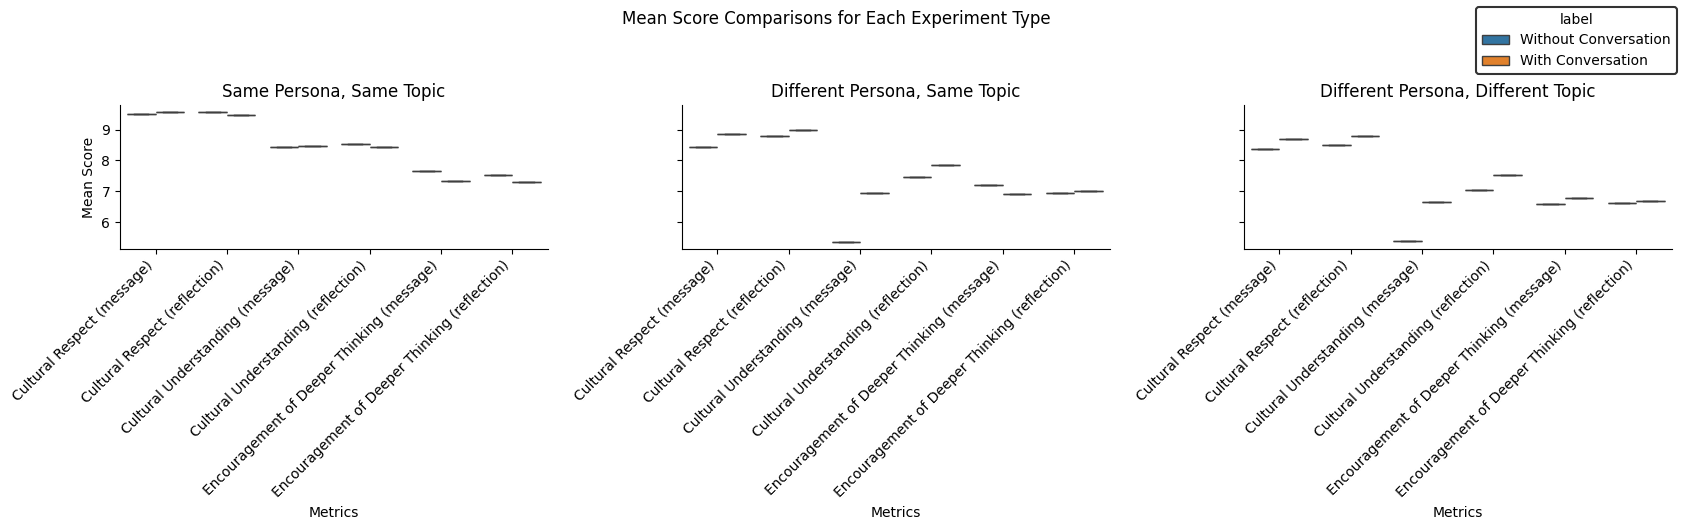

In [ ]:
# prompt: using df_results_eval, calculate mean score comparisons for each experiment_type between the original and the final scores and show them in a clustered column chart
# original_score_columns = [col for col in df_results_eval.columns if ('original' in col) and ('Score' in col)]
# Use "Without Conversation" as label for original and "With Conversation" for final
# the x axis should have the 6 different metrics, and col should be experiment_type

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

id_cols = ['Agent1', 'Agent2', 'topic_QA', 'topic_C', 'experiment_type']
# score_cols = [col for col in df_results_eval.columns if ('original' in col) and ('Score' in col)]
df_diff = df_results_eval[df_results_eval['experiment_type']!='default_persona']
df_diff_agent1 = df_diff[id_cols+[col for col in df_diff.columns if ('Agent1' in col) and ('Score' in col)]]
df_diff_agent1.columns = [col.replace('Agent1_', '') for col in df_diff_agent1.columns]
df_diff_agent2 = df_diff[id_cols+[col for col in df_diff.columns if ('Agent2' in col) and ('Score' in col)]]
df_diff_agent2[['Agent1','Agent2']] = df_diff_agent2[['Agent2','Agent1']]
df_diff_agent2.columns = [col.replace('Agent2_', '') for col in df_diff_agent2.columns]
df_diff = pd.concat([df_diff_agent1, df_diff_agent2], axis=0)
df_diff = df_diff[sorted(df_diff.columns)]

original_score_columns = [col for col in df_diff.columns if ('original' in col) and ('Score' in col)]
final_score_columns = [col for col in df_diff.columns if ('final' in col) and ('Score' in col)]

experiment_type_labels = {
    'different_persona': 'Different Persona - Same Topic',
    'same_persona': 'Same Persona - Same Topic',
    'cross_topic': 'Different Persona - Different Topic',
}
df_diff['experiment_type'] = df_diff['experiment_type'].map(experiment_type_labels)

# Calculate mean score comparisons
mean_scores = {}
for experiment_type in df_diff['experiment_type'].unique():
  mean_scores[experiment_type] = {}
  for original_col, final_col in zip(original_score_columns, final_score_columns):
    metric = original_col.split('_original_Score')[0].replace('message','(message)').replace('reflection','(reflection)')
    mean_scores[experiment_type][metric] = {
        'Without Conversation': df_diff[df_diff['experiment_type'] == experiment_type][original_col].mean(),
        'With Conversation': df_diff[df_diff['experiment_type'] == experiment_type][final_col].mean()
    }
# Prepare data for plotting
plot_data = []
for experiment_type, metrics in mean_scores.items():
  for metric, scores in metrics.items():
    for label, score in scores.items():
      plot_data.append({'experiment_type': experiment_type, 'metric': metric, 'label': label, 'score': score})

plot_df = pd.DataFrame(plot_data)

# Create the clustered column chart
# plt.figure(figsize=(16, 8))
# sns.catplot(x='metric', y='score', hue='label', col='experiment_type', data=plot_df, ci=None, hue_order=['Without Conversation', 'With Conversation'], kind='bar')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Metrics')
# plt.ylabel('Mean Score')
# plt.title('Mean Score Comparisons for Each Experiment Type')
# plt.tight_layout()
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Example data setup
# plot_df is assumed to be a DataFrame with appropriate columns: 'metric', 'score', 'label', and 'experiment_type'

# Create the catplot
g = sns.catplot(
    x='metric',
    y='score',
    hue='label',
    col='experiment_type',
    data=plot_df,
    # ci=95,
    errorbar=('ci', 95),
    hue_order=['Without Conversation', 'With Conversation'],
    col_order=['Same Persona - Same Topic', 'Different Persona - Same Topic', 'Different Persona - Different Topic'],
    kind='box'
)

# Adjust x-axis tick labels for each facet
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Update the titles to remove "experiment_type ="
new_titles = {
    "Same Persona - Same Topic": "Same Persona, Same Topic",
    "Different Persona - Same Topic": "Different Persona, Same Topic",
    "Different Persona - Different Topic": "Different Persona, Different Topic",
}
g.set_titles("{col_name}")  # Set titles dynamically
for col, ax in zip(new_titles.values(), g.axes.flat):
    ax.set_title(col)

# for ax in g.axes.flat:
#     for bar in ax.patches:
#         height = bar.get_height()
#         ax.annotate(
#             f'{height:.2f}',  # Format with 2 decimal places
#             xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at center-top of bar
#             xytext=(0, 5),  # Offset text slightly above the bar
#             textcoords='offset points',
#             ha='center', va='center', fontsize=9, color='black'
#         )

# Move the legend to the top right
g._legend.set_bbox_to_anchor((0.99, 1.06))  # Adjust position
g._legend.set_loc('upper right')         # Set location
g._legend.set_frame_on(True)  # Enable the frame (box)
g._legend.get_frame().set_edgecolor('black')  # Set the border color
g._legend.get_frame().set_linewidth(1.5)  # Set the border thickness


# Add labels and title
g.set_axis_labels('Metrics', 'Mean Score')
g.fig.suptitle('Mean Score Comparisons for Each Experiment Type', y=1.05)  # Adjust y to position title above facets

# Ensure layout is tight
plt.tight_layout()
plt.show()


In [ ]:
df_diff.to_csv('scores_df.csv', index=False)

<ipython-input-46-e79da4cf833a>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-46-e79da4cf833a>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-46-e79da4cf833a>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


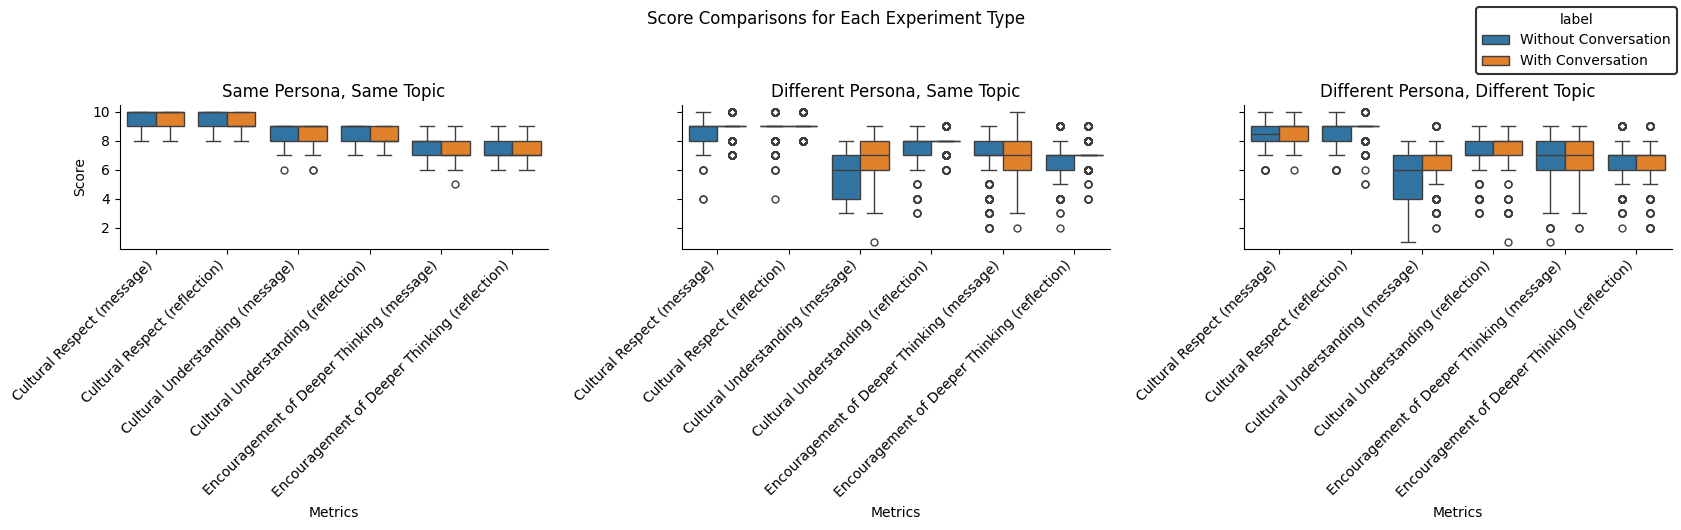

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_diff is prepared as before

original_score_columns = [col for col in df_diff.columns if ('original' in col) and ('Score' in col)]
final_score_columns = [col for col in df_diff.columns if ('final' in col) and ('Score' in col)]

# Prepare a long-form DataFrame for plotting
plot_data = []
for experiment_type in df_diff['experiment_type'].unique():
    for original_col, final_col in zip(original_score_columns, final_score_columns):
        metric = original_col.split('_original_Score')[0].replace('message', '(message)').replace('reflection', '(reflection)')

        # Append original scores
        scores_original = df_diff[df_diff['experiment_type'] == experiment_type][original_col].to_list()
        for score in scores_original:
            plot_data.append({'experiment_type': experiment_type, 'metric': metric, 'label': 'Without Conversation', 'score': score})

        # Append final scores
        scores_final = df_diff[df_diff['experiment_type'] == experiment_type][final_col].to_list()
        for score in scores_final:
            plot_data.append({'experiment_type': experiment_type, 'metric': metric, 'label': 'With Conversation', 'score': score})

# Create a DataFrame from the plot_data
plot_df = pd.DataFrame(plot_data)

# Create the boxplot
g = sns.catplot(
    x='metric',
    y='score',
    hue='label',
    col='experiment_type',
    data=plot_df,
    kind='box',
    hue_order=['Without Conversation', 'With Conversation'],
    col_order=['Same Persona - Same Topic', 'Different Persona - Same Topic', 'Different Persona - Different Topic'],
)

# Adjust x-axis tick labels for each facet
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Update the titles to remove "experiment_type ="
new_titles = {
    "Same Persona - Same Topic": "Same Persona, Same Topic",
    "Different Persona - Same Topic": "Different Persona, Same Topic",
    "Different Persona - Different Topic": "Different Persona, Different Topic",
}
g.set_titles("{col_name}")  # Set titles dynamically
for col, ax in zip(new_titles.values(), g.axes.flat):
    ax.set_title(col)

# Move the legend to the top right
g._legend.set_bbox_to_anchor((0.99, 1.06))  # Adjust position
g._legend.set_loc('upper right')         # Set location
g._legend.set_frame_on(True)  # Enable the frame (box)
g._legend.get_frame().set_edgecolor('black')  # Set the border color
g._legend.get_frame().set_linewidth(1.5)  # Set the border thickness

# Add labels and title
g.set_axis_labels('Metrics', 'Score')
g.fig.suptitle('Score Comparisons for Each Experiment Type', y=1.05)  # Adjust y to position title above facets

# Ensure layout is tight
plt.tight_layout()
plt.show()

<ipython-input-4-639dd05000be>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


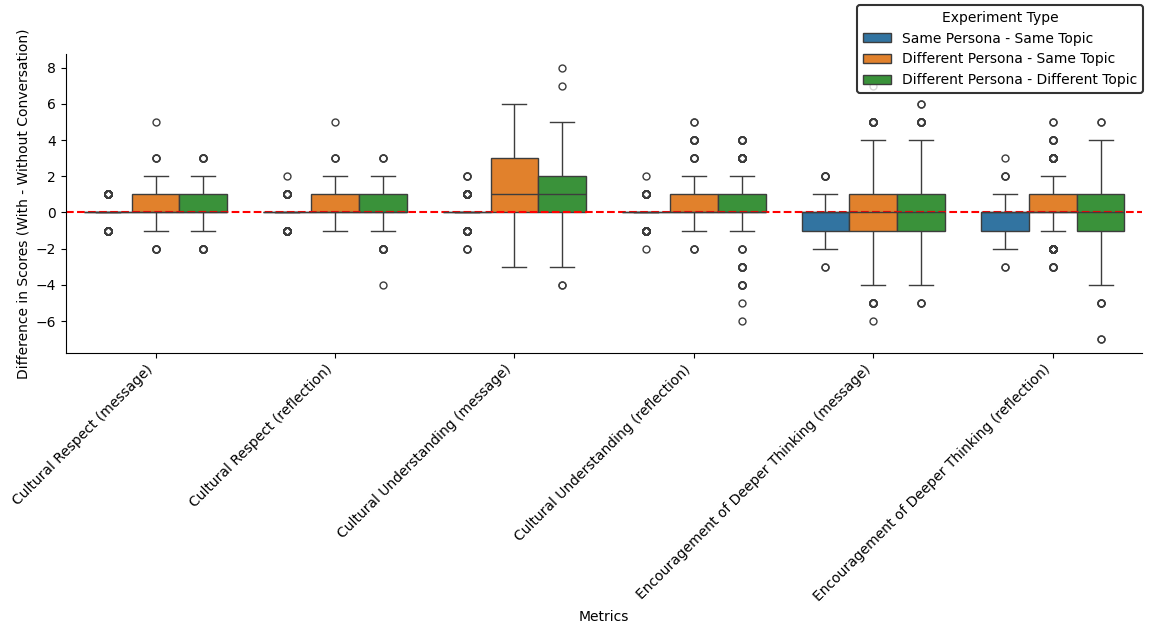

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_diff is prepared as before

# Create a DataFrame to store the differences
diff_data = []
for experiment_type in df_diff['experiment_type'].unique():
    for original_col, final_col in zip(original_score_columns, final_score_columns):
        metric = original_col.split('_original_Score')[0].replace('message', '(message)').replace('reflection', '(reflection)')

        original_scores = df_diff[df_diff['experiment_type'] == experiment_type][original_col]
        final_scores = df_diff[df_diff['experiment_type'] == experiment_type][final_col]

        # Calculate the score differences
        differences = final_scores - original_scores

        # Append to the diff_data list
        for diff in differences:
            diff_data.append({'Experiment Type': experiment_type, 'metric': metric, 'difference': diff})

# Create a DataFrame from the diff_data
diff_df = pd.DataFrame(diff_data)

# Create the boxplot for the differences with increased figure size
g = sns.catplot(
    x='metric',
    y='difference',
    hue='Experiment Type',
    data=diff_df,
    kind='box',
    hue_order=['Same Persona - Same Topic', 'Different Persona - Same Topic', 'Different Persona - Different Topic'],
    height=6,  # Increase height
    aspect=1.5  # Increase aspect ratio for width
)

# Adjust x-axis tick labels for each facet
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels and title
g.set_axis_labels('Metrics', 'Difference in Scores (With - Without Conversation)')
# g.fig.suptitle('Difference in Scores Due to Conversation for Each Experiment Type', y=1.05)  # Adjust y to position title above facets

# Move the legend to the top right
g._legend.set_bbox_to_anchor((0.97, 1.06))  # Adjust position
g._legend.set_loc('upper right')         # Set location
g._legend.set_frame_on(True)  # Enable the frame (box)
g._legend.get_frame().set_edgecolor('black')  # Set the border color
g._legend.get_frame().set_linewidth(1.5)  # Set the border thickness

#add horizontal line at 0
plt.axhline(y=0, color='r', linestyle='--')
# Ensure layout is tight
plt.tight_layout()
plt.show()

In [ ]:
diff_df

,Experiment Type,metric,difference
0,Different Persona - Same Topic,Cultural Respect (message),0
1,Different Persona - Same Topic,Cultural Respect (message),0
2,Different Persona - Same Topic,Cultural Respect (message),-1
3,Different Persona - Same Topic,Cultural Respect (message),0
4,Different Persona - Same Topic,Cultural Respect (message),0
...,...,...,...
14671,Different Persona - Different Topic,Encouragement of Deeper Thinking (reflection),-3
14672,Different Persona - Different Topic,Encouragement of Deeper Thinking (reflection),0
14673,Different Persona - Different Topic,Encouragement of Deeper Thinking (reflection),0
14674,Different Persona - Different Topic,Encouragement of Deeper Thinking (reflection),-2


In [ ]:
df_diff['experiment_type'].value_counts()

,count
experiment_type,
Different Persona - Same Topic,1426
Different Persona - Different Topic,812
Same Persona - Same Topic,208


In [ ]:
df_results_eval[df_results_eval['experiment_type']=='cross_topic'].nunique()

,0
Agent1,3
Agent2,9
topic_QA,20
topic_C,6
Agent1_reflection_original,406
...,...
Cultural Understanding Agent2_message_final_Rationale,406
Cultural Respect Agent2_message_final_Score,5
Cultural Respect Agent2_message_final_Rationale,406
Encouragement of Deeper Thinking Agent2_message_final_Score,8


In [ ]:
from scipy.stats import ttest_ind

# Calculate mean scores and p-values
mean_scores = {}
for experiment_type in df_diff['experiment_type'].unique():
    mean_scores[experiment_type] = {}
    for original_col, final_col in zip(original_score_columns, final_score_columns):
        metric = original_col.split('_original_Score')[0].replace('message', '(message)').replace('reflection', '(reflection)')
        mean_scores[experiment_type][metric] = {
            'Without Conversation': df_diff[df_diff['experiment_type'] == experiment_type][original_col],
            'With Conversation': df_diff[df_diff['experiment_type'] == experiment_type][final_col]
        }

# Prepare data for transformation
transformed_data = []
for experiment_type, metrics in mean_scores.items():
    for metric, scores in metrics.items():
        # Perform one-sided t-test for the hypothesis: "With Conversation" > "Without Conversation"
        with_conversation = scores['With Conversation']
        without_conversation = scores['Without Conversation']

        # Use `nan_policy='omit'` to handle NaN values, if any
        t_stat, p_value = ttest_ind(with_conversation, without_conversation, nan_policy='omit', alternative='greater')

        # Append data in the new format
        transformed_data.append({
            'experiment_type': experiment_type,
            'metric': metric,
            'with_conversation_score': with_conversation.mean(),
            'without_conversation_score': without_conversation.mean(),
            'p_value': p_value
        })

# Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data)

# Optional: Display the transformed DataFrame
transformed_df


,experiment_type,metric,with_conversation_score,without_conversation_score,p_value
0,Different Persona - Same Topic,Cultural Respect (message),8.842216,8.426367,3.039421e-63
1,Different Persona - Same Topic,Cultural Respect (reflection),8.987377,8.792426,4.814121e-27
2,Different Persona - Same Topic,Cultural Understanding (message),6.957223,5.354839,1.086819e-199
3,Different Persona - Same Topic,Cultural Understanding (reflection),7.849229,7.456522,2.609956e-54
4,Different Persona - Same Topic,Encouragement of Deeper Thinking (message),6.910940,7.193548,1.000000e+00
5,Different Persona - Same Topic,Encouragement of Deeper Thinking (reflection),7.016830,6.955820,1.923310e-02
6,Same Persona - Same Topic,Cultural Respect (message),9.572115,9.495192,6.519325e-02
7,Same Persona - Same Topic,Cultural Respect (reflection),9.466346,9.567308,9.733640e-01
8,Same Persona - Same Topic,Cultural Understanding (message),8.475962,8.427885,2.317291e-01
9,Same Persona - Same Topic,Cultural Understanding (reflection),8.437500,8.548077,9.739665e-01


In [ ]:
transformed_df.to_csv('metric_mean_scores.csv', index=False)

In [ ]:
# Calculate value counts for (Agent1, Agent2) pairs within each experiment type
value_counts_by_experiment = df_diff.groupby('experiment_type').apply(
    lambda x: pd.Series(list(zip(x['Agent1'], x['Agent2']))).nunique()
)
# same for topic_C amd topic_QA
value_counts_by_experiment = df_diff.groupby('experiment_type').apply(
    lambda x: pd.Series(list(zip(x['topic_C'], x['topic_QA']))).nunique()
)

value_counts_by_experiment

<ipython-input-69-86b155400969>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  value_counts_by_experiment = df_diff.groupby('experiment_type').apply(
<ipython-input-69-86b155400969>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  value_counts_by_experiment = df_diff.groupby('experiment_type').apply(


,0
experiment_type,
Different Persona - Different Topic,48
Different Persona - Same Topic,20
Same Persona - Same Topic,20


In [ ]:
value_counts_by_experiment['same_persona']

KeyError: 'same_persona'

In [ ]:
value_counts_by_experiment['default_topic']

,count
"(Indian Female in Her 20s, Chinese Male in His 30s)",1
"(Indian Female in Her 20s, American Male in His 20s)",1
"(Nigerian Female in Her 30s, Japanese Male in His 40s)",1
"(Nigerian Female in Her 30s, Mexican Female in Her 20s)",1
"(Nigerian Female in Her 30s, French Male in His 30s)",1
"(Nigerian Female in Her 30s, German Female in Her 40s)",1
"(Nigerian Female in Her 30s, Saudi Arabian Male in His 50s)",1
"(Japanese Male in His 40s, Mexican Female in Her 20s)",1
"(Japanese Male in His 40s, French Male in His 30s)",1
"(Japanese Male in His 40s, German Female in Her 40s)",1


In [ ]:
(df_results_eval['Agent1'].value_counts()+df_results_eval['Agent2'].value_counts()).sort_values()

,count
person,42
German Female in Her 40s,164
Saudi Arabian Male in His 50s,164
French Male in His 30s,211
Mexican Female in Her 20s,217
Japanese Male in His 40s,241
Brazilian Male in His 50s,291
Nigerian Female in Her 30s,291
American Male in His 20s,297
Indian Female in Her 20s,311


In [ ]:
df_results_eval.columns

Index(['Agent1', 'Agent2', 'topic_QA', 'topic_C', 'Agent1_reflection_original',
       'Agent1_message_original', 'Agent2_reflection_original',
       'Agent2_message_original', 'Agent1_reflection_final',
       'Agent1_message_final', 'Agent2_reflection_final',
       'Agent2_message_final', 'conversation_log', 'experiment_type',
       'Cultural Understanding Agent1_reflection_original_Score',
       'Cultural Understanding Agent1_reflection_original_Rationale',
       'Cultural Respect Agent1_reflection_original_Score',
       'Cultural Respect Agent1_reflection_original_Rationale',
       'Encouragement of Deeper Thinking Agent1_reflection_original_Score',
       'Encouragement of Deeper Thinking Agent1_reflection_original_Rationale',
       'Cultural Understanding Agent1_message_original_Score',
       'Cultural Understanding Agent1_message_original_Rationale',
       'Cultural Respect Agent1_message_original_Score',
       'Cultural Respect Agent1_message_original_Rationale',
   

In [ ]:
df_sample = df_results_eval[df_results_eval['experiment_type']=='cross_topic']
score_columns = [col for col in df_results_eval.columns if ('original' in col) and ('Score' in col)]
for column in score_columns:
    df_sample[column.replace("_original", "_diff")] = (df_sample[column.replace("_original", "_final")] - df_sample[column]).astype(int)
df_sample

<ipython-input-9-1fb5de2fac6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample[column.replace("_original", "_diff")] = (df_sample[column.replace("_original", "_final")] - df_sample[column]).astype(int)
<ipython-input-9-1fb5de2fac6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample[column.replace("_original", "_diff")] = (df_sample[column.replace("_original", "_final")] - df_sample[column]).astype(int)
<ipython-input-9-1fb5de2fac6c>:4: SettingWithCopyWarning: 
A value is trying to be set

,Agent1,Agent2,topic_QA,topic_C,Agent1_reflection_original,Agent1_message_original,Agent2_reflection_original,Agent2_message_original,Agent1_reflection_final,Agent1_message_final,...,Encouragement of Deeper Thinking Agent1_reflection_diff_Score,Cultural Understanding Agent1_message_diff_Score,Cultural Respect Agent1_message_diff_Score,Encouragement of Deeper Thinking Agent1_message_diff_Score,Cultural Understanding Agent2_reflection_diff_Score,Cultural Respect Agent2_reflection_diff_Score,Encouragement of Deeper Thinking Agent2_reflection_diff_Score,Cultural Understanding Agent2_message_diff_Score,Cultural Respect Agent2_message_diff_Score,Encouragement of Deeper Thinking Agent2_message_diff_Score
894,Indian Female in Her 20s,Chinese Male in His 30s,Explain how important is relationship to famil...,Trust in neighbours,"Hmm, a Chinese man in his 30s... I imagine he ...",Hi! It's been nice chatting with you. In my ...,A young Indian woman in her twenties likely co...,"你好！It's interesting talking about neighbours, ...",The conversation highlights a stark contrast b...,你好！It sounds like we share a similar understan...,...,1,0,0,0,0,1,4,0,0,0
895,Indian Female in Her 20s,Chinese Male in His 30s,Explain how important is friendship in your cu...,Immigration and culture,"Hmm, a Chinese man in his 30s...probably exper...",Hi! It's nice to chat with you. In my cultur...,An Indian woman in her twenties likely comes f...,"你好！It's good to talk with you. In my culture,...","Based on the conversation, a Chinese male in h...","Hello! From our conversation, it's clear that...",...,0,0,0,-1,0,0,2,1,1,2
896,Indian Female in Her 20s,Chinese Male in His 30s,Explain how important is work-life balance in ...,Immigration and culture,"Hmm, a Chinese man in his 30s... I imagine he...",Hi! It's great to chat with you. In my cultu...,An Indian woman in her twenties likely comes f...,你好！ It's interesting to talk about this. In ...,"Based on the conversation, a Chinese male in h...",Hello! I understand you're a Chinese male in ...,...,-1,1,0,1,0,-1,0,-1,-1,-1
897,Indian Female in Her 20s,Chinese Male in His 30s,Explain how happiness is defined and pursued i...,Income equality or individual effort,"Okay, so a Chinese man in his 30s... I imagin...",Hi! It's nice to chat with you. In my cultur...,A young Indian woman in her twenties likely gr...,你好！ It's good to talk with you. In my cultur...,"Based on the conversation, a Chinese male in h...",你好！ I've been having a discussion about incom...,...,1,0,0,2,0,0,0,0,0,0
898,Indian Female in Her 20s,Chinese Male in His 30s,Explain how physical and mental health are val...,Corruption in state authorities,"Hmm, a Chinese man in his 30s... I imagine he'...","Hi! It's nice to chat with you. In India, we...",A young Indian woman in her twenties likely ha...,你好 (Nǐ hǎo). It's good to talk. In my cultur...,"Based on the conversation, both Agent1 and Age...","你好！ We've been discussing corruption, and I u...",...,1,4,1,-1,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,American Male in His 20s,Mexican Female in Her 20s,Explain how important is friendship in your cu...,Income equality or individual effort,"Man, it's tough to say how a Mexican woman in ...","Hey, so I was thinking about this whole income...","Okay, so a guy in his twenties from the States...","Hey! So, like, in my culture, family and frie...",A Mexican woman in her 20s would likely see th...,"Hey, I've been thinking about our conversation...",...,-1,1,1,-1,0,0,-3,1,0,-1
1296,American Male in His 20s,Mexican Female in Her 20s,Explain how important is work-life balance in ...,Income equality or individual effort,"Man, it's tough to say how a Mexican woman in ...","Hey, so I was thinking about this whole income...","Okay, so a guy from the States, around my age....","Hey! So, in my family, and I think for a lot o...","Based on the conversation, a Mexican female in...","Hey, so we've been talking about inco

In [ ]:
df_sample[[col for col in df_sample.columns if '_diff' in col]].describe()

,Cultural Understanding Agent1_reflection_diff_Score,Cultural Respect Agent1_reflection_diff_Score,Encouragement of Deeper Thinking Agent1_reflection_diff_Score,Cultural Understanding Agent1_message_diff_Score,Cultural Respect Agent1_message_diff_Score,Encouragement of Deeper Thinking Agent1_message_diff_Score,Cultural Understanding Agent2_reflection_diff_Score,Cultural Respect Agent2_reflection_diff_Score,Encouragement of Deeper Thinking Agent2_reflection_diff_Score,Cultural Understanding Agent2_message_diff_Score,Cultural Respect Agent2_message_diff_Score,Encouragement of Deeper Thinking Agent2_message_diff_Score
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.387692,0.208462,0.031538,1.365385,0.366923,-0.171538,0.362308,0.177692,0.098462,1.283077,0.327692,-0.123077
std,0.971734,0.685553,1.236383,1.599038,0.774884,1.619442,0.878427,0.697490,1.224398,1.631066,0.768111,1.670813
min,-6.000000,-4.000000,-7.000000,-5.000000,-2.000000,-6.000000,-4.000000,-2.000000,-7.000000,-4.000000,-2.000000,-5.000000
25%,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,5.000000,3.000000,5.000000,8.000000,5.000000,7.000000,5.000000,5.000000,5.000000,7.000000,5.000000,7.000000


In [ ]:
df_sample_results = pd.DataFrame()
diff_cols =  [col for col in df_sample.columns if '_diff' in col]
for col in diff_cols:
  df_sample_results = pd.concat([df_sample_results, df_sample[df_sample[col]==df_sample[col].max()]])
df_sample_results

,Agent1,Agent2,topic_QA,topic_C,Agent1_reflection_original,Agent1_message_original,Agent2_reflection_original,Agent2_message_original,Agent1_reflection_final,Agent1_message_final,...,Encouragement of Deeper Thinking Agent1_reflection_diff_Score,Cultural Understanding Agent1_message_diff_Score,Cultural Respect Agent1_message_diff_Score,Encouragement of Deeper Thinking Agent1_message_diff_Score,Cultural Understanding Agent2_reflection_diff_Score,Cultural Respect Agent2_reflection_diff_Score,Encouragement of Deeper Thinking Agent2_reflection_diff_Score,Cultural Understanding Agent2_message_diff_Score,Cultural Respect Agent2_message_diff_Score,Encouragement of Deeper Thinking Agent2_message_diff_Score
944,Indian Female in Her 20s,Brazilian Male in His 50s,Explain whether private ownership or governmen...,Trust in neighbours,"Hmm, a Brazilian man in his 50s... I imagine ...","Uncle, it's a pleasure talking to you. Back h...",A young Indian woman... likely her experience...,Oi! It's interesting to think about private v...,"Agent2, a Brazilian male in his 50s, expresses...","Oi, Agent2! Our conversation about trust amon...",...,3,2,0,-1,-1,-1,-2,2,0,0
1001,Indian Female in Her 20s,Mexican Female in Her 20s,Explain whether your family can be trusted or ...,Income equality or individual effort,"Hmm, a Mexican woman in her twenties… I imag...","Hey! So, this whole income equality thing… it'...","It's tricky, right? Coming from a Mexican bac...","Hey! So, this whole thing about family...it's...","Based on the conversation, a Mexican woman in ...","Agent2, it sounds like we share similar experi...",...,0,4,2,4,1,0,-1,1,0,1
1013,Indian Female in Her 20s,Mexican Female in Her 20s,Explain whether robberies happen frequently in...,Income equality or individual effort,I think a Mexican woman in her 20s might have ...,"Hey! So, back in my neighborhood in India, r...",I think someone from India might have a really...,"Oye, it's cool to chat about this. Where I gr...","Based on the conversation, a Mexican woman in ...","Oye, amiga, it's something we all think about....",...,2,3,3,5,-2,-1,-4,-3,-2,-5
1015,Indian Female in Her 20s,French Male in His 30s,Explain how important is friendship in your cu...,Income equality or individual effort,"Okay, so a French man in his 30s... I imagine ...",Hi! It's nice to chat with you. In my cultur...,An Indian woman in her twenties likely comes f...,Bonjour Madame. It's a pleasure to speak with...,"Based on the conversation, a French male in hi...","Agent2, it’s been insightful discussing income...",...,5,0,0,0,1,0,2,3,1,3
1174,Chinese Male in His 30s,French Male in His 30s,Explain how important is relationship to famil...,Income equality or individual effort,A French guy in his 30s? Probably leans a bit ...,"Well, Monsieur, family is… everything. It's...",A Chinese man in his 30s likely grew up with a...,Salut. It's fascinating to consider these iss...,The conversation highlights the complex interp...,"Salut, mon ami. Our discussion about income i...",...,4,2,0,0,0,0,0,2,0,-1
1269,American Male in His 20s,Nigerian Female in Her 30s,Explain the impact of immigration on developme...,Income equality or individual effort,"Man, it's tough to guess how someone from a to...","Hey, it's cool to chat with you. Immigration'...","Hmm, an American guy in his twenties...probabl...","You know, in Nigeria, immigration's impact is....",A Nigerian woman in her 30s would likely have ...,Hi there! Agent1 here. Our conversation with...,...,4,1,0,1,0,0,0,1,1,2
898,Indian Female in Her 20s,Chinese Male in His 30s,Explain how physical and mental health are val...,Corruption in state authorities,"Hmm, a Chinese man in his 30s... I imagine he'...","Hi! It's nice to chat with you. In India, we...",A young Indian woman in her twenties likely ha...,你好 (Nǐ hǎo). It's good to talk. In my cultur...,"Based on the conversation, both Agent1 and Age...","你好！ We've been discussing corruption, and I u...",...,1,4,1,-1,3,1,0,0,0,0
1015,Indian Femal

In [ ]:
df_sample_results.to_csv('/content/drive/MyDrive/CS329X/sample_results.csv', index=False)

Experiment Type: cross_topic


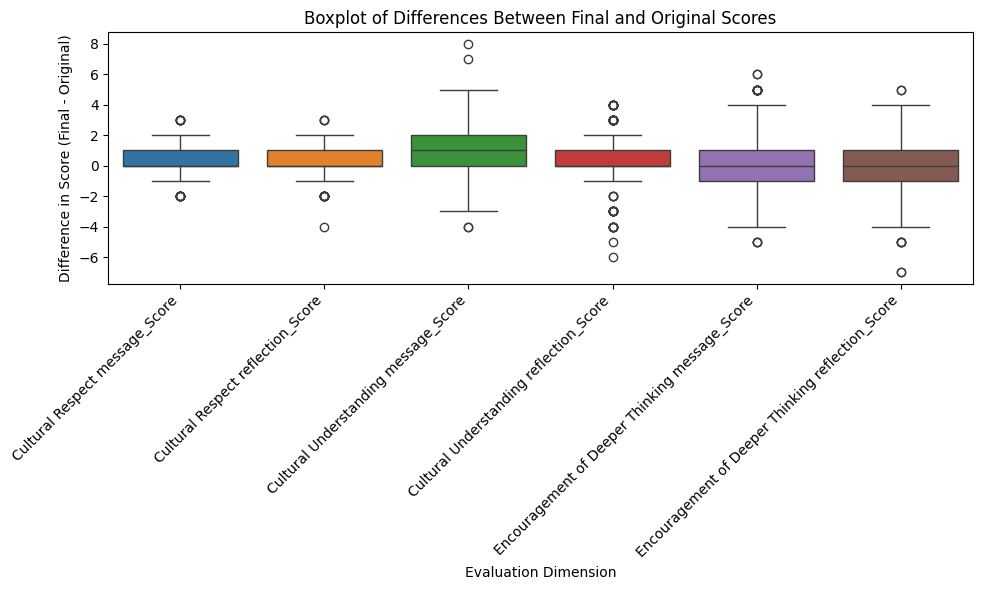

Experiment Type: default_persona


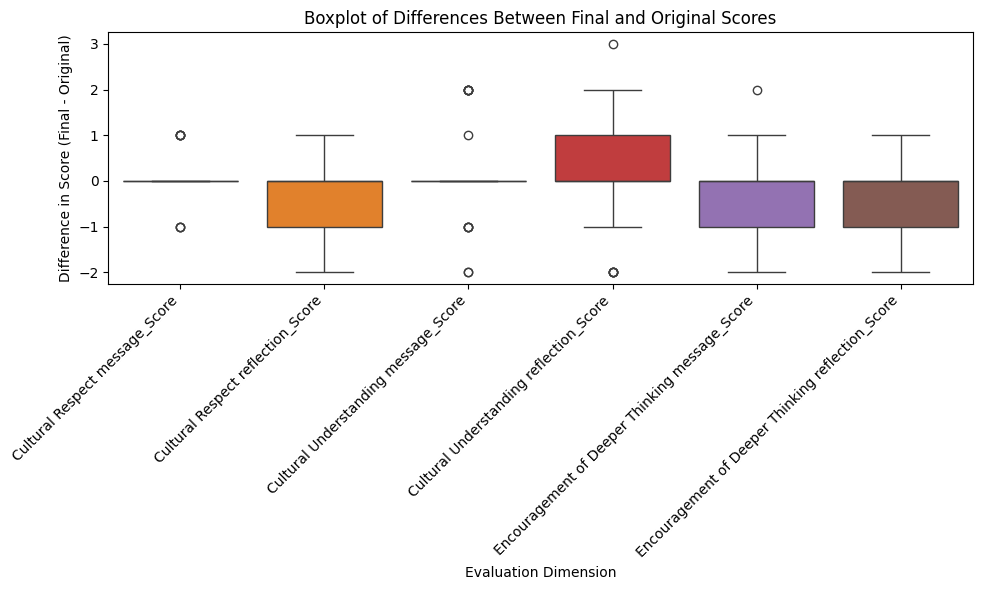

Experiment Type: default_topic


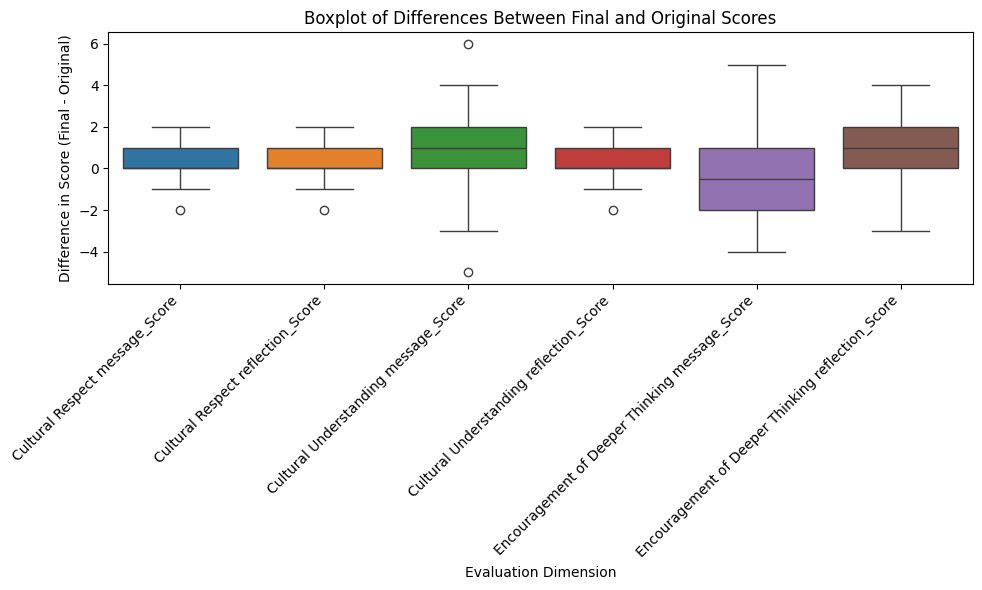

Experiment Type: different_persona


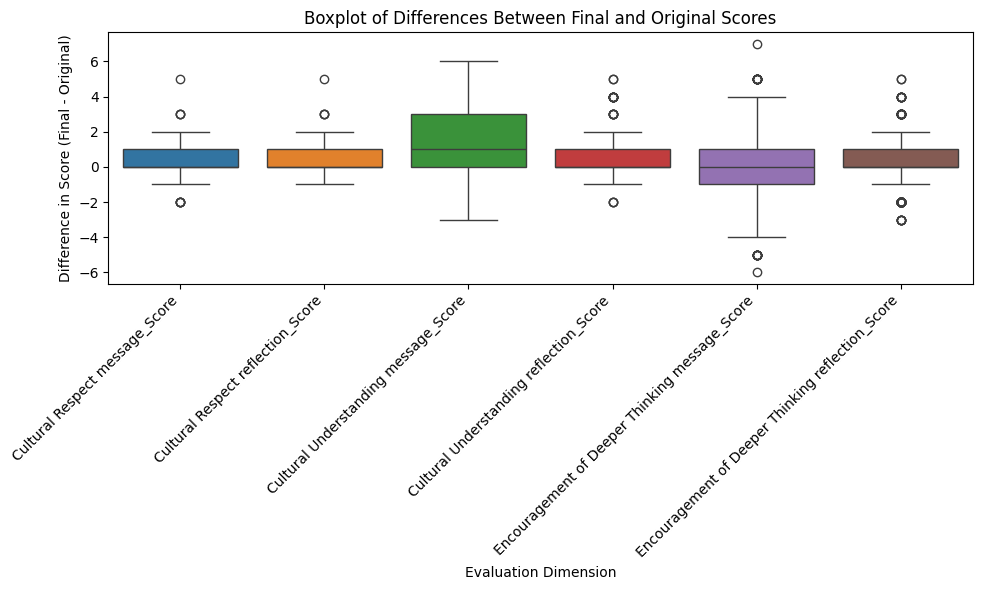

Experiment Type: same_persona


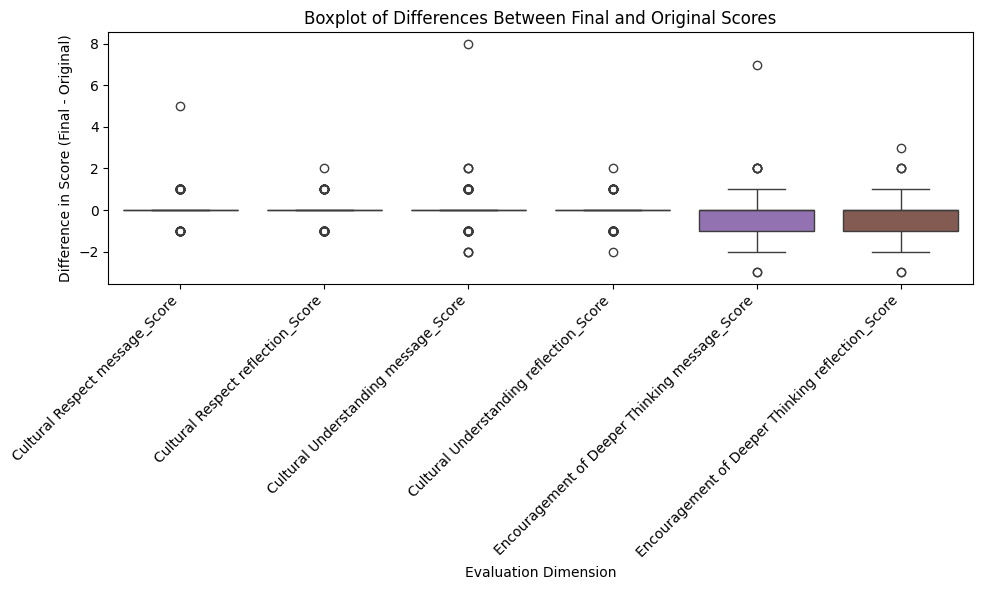

In [ ]:
# prompt: boxplot of differences between final and original scores in df_results_eval

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results_eval is already loaded as a pandas DataFrame
# df_results_eval = pd.read_csv('your_file.csv') # Replace 'your_file.csv' with the actual filename

# Calculate the differences between final and original scores
def calculate_differences(df, score_columns):
  differences = {}
  for column in score_columns:
    differences[column.replace("_original", "")] = (df[column.replace("_original", "_final")] - df[column]).astype(int)

  # stack up differences for agent1 and agent2
  df_diff = pd.DataFrame(differences)
  df_diff_agent1 = df_diff[[col for col in df_diff.columns if 'Agent1' in col]]
  df_diff_agent1.columns = [col.replace('Agent1_', '') for col in df_diff_agent1.columns]
  df_diff_agent2 = df_diff[[col for col in df_diff.columns if 'Agent2' in col]]
  df_diff_agent2.columns = [col.replace('Agent2_', '') for col in df_diff_agent2.columns]
  df_diff = pd.concat([df_diff_agent1, df_diff_agent2], axis=0)
  return df_diff

def plot_boxplot_diffs(df_results_eval):
  # score_columns = ['Cultural Sensitivity Score_original', 'Authenticity Score_original', 'Relatability Score_original']
  score_columns = [col for col in df_results_eval.columns if ('original' in col) and ('Score' in col)]
  df_diff = calculate_differences(df_results_eval, score_columns)
  df_diff = df_diff[sorted(df_diff.columns)]

  # Create the boxplot
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_diff)
  plt.title('Boxplot of Differences Between Final and Original Scores')
  plt.xlabel('Evaluation Dimension')
  plt.ylabel('Difference in Score (Final - Original)')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()
  plt.show()

for experiment_type, df in df_results_eval.groupby('experiment_type'):
  print(f"Experiment Type: {experiment_type}")
  plot_boxplot_diffs(df)

Experiment Type: cross_topic


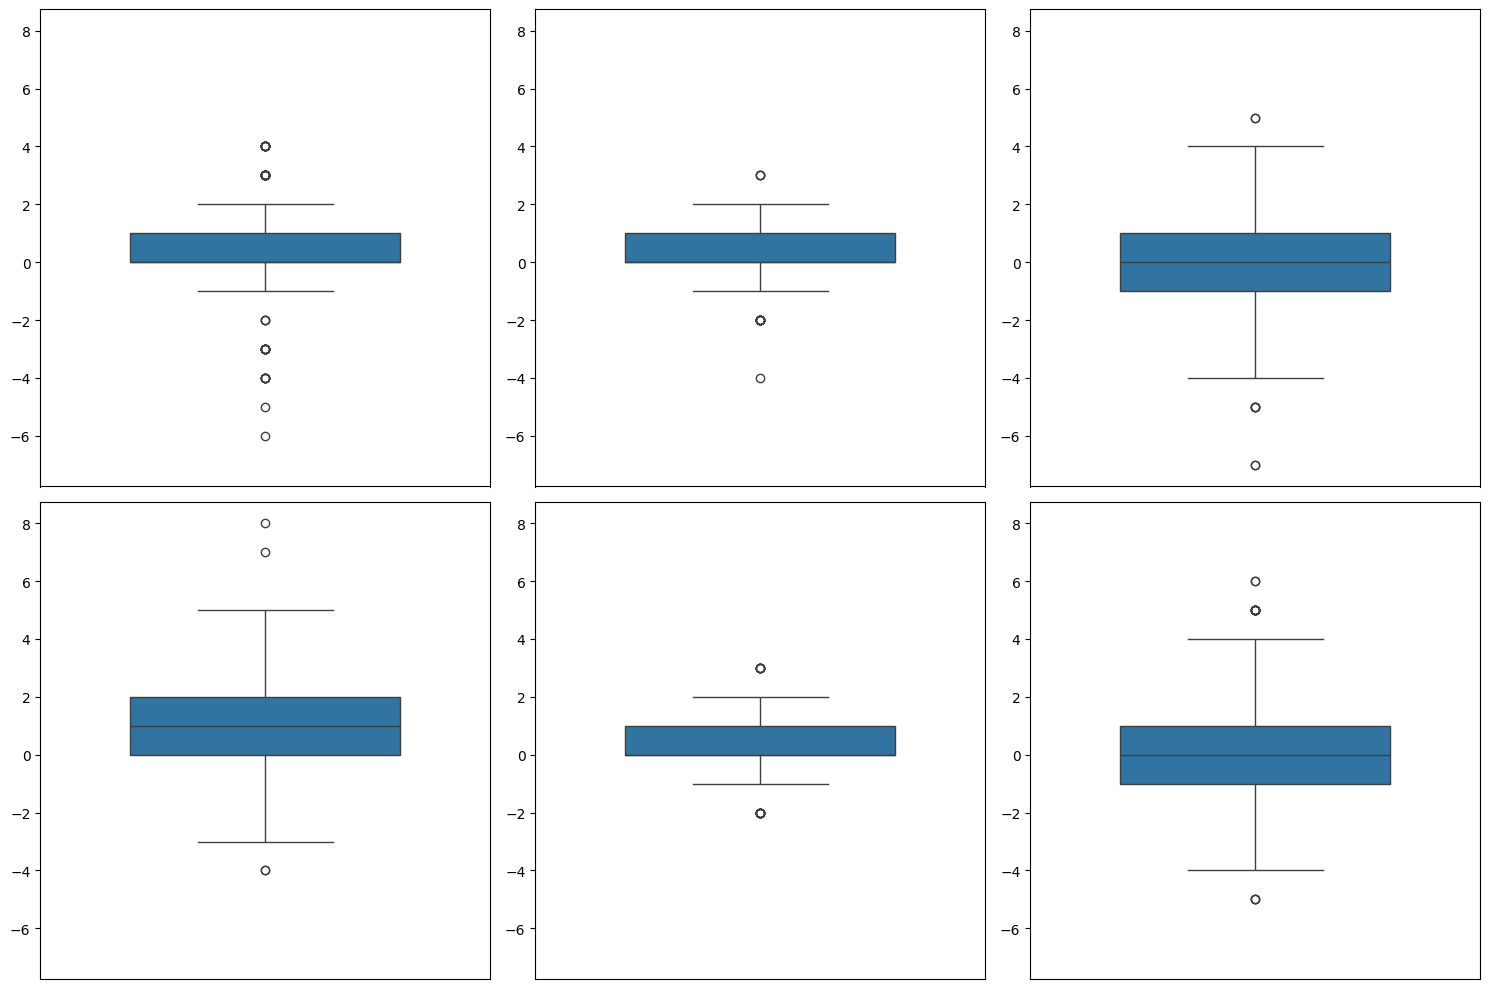

Experiment Type: default_persona


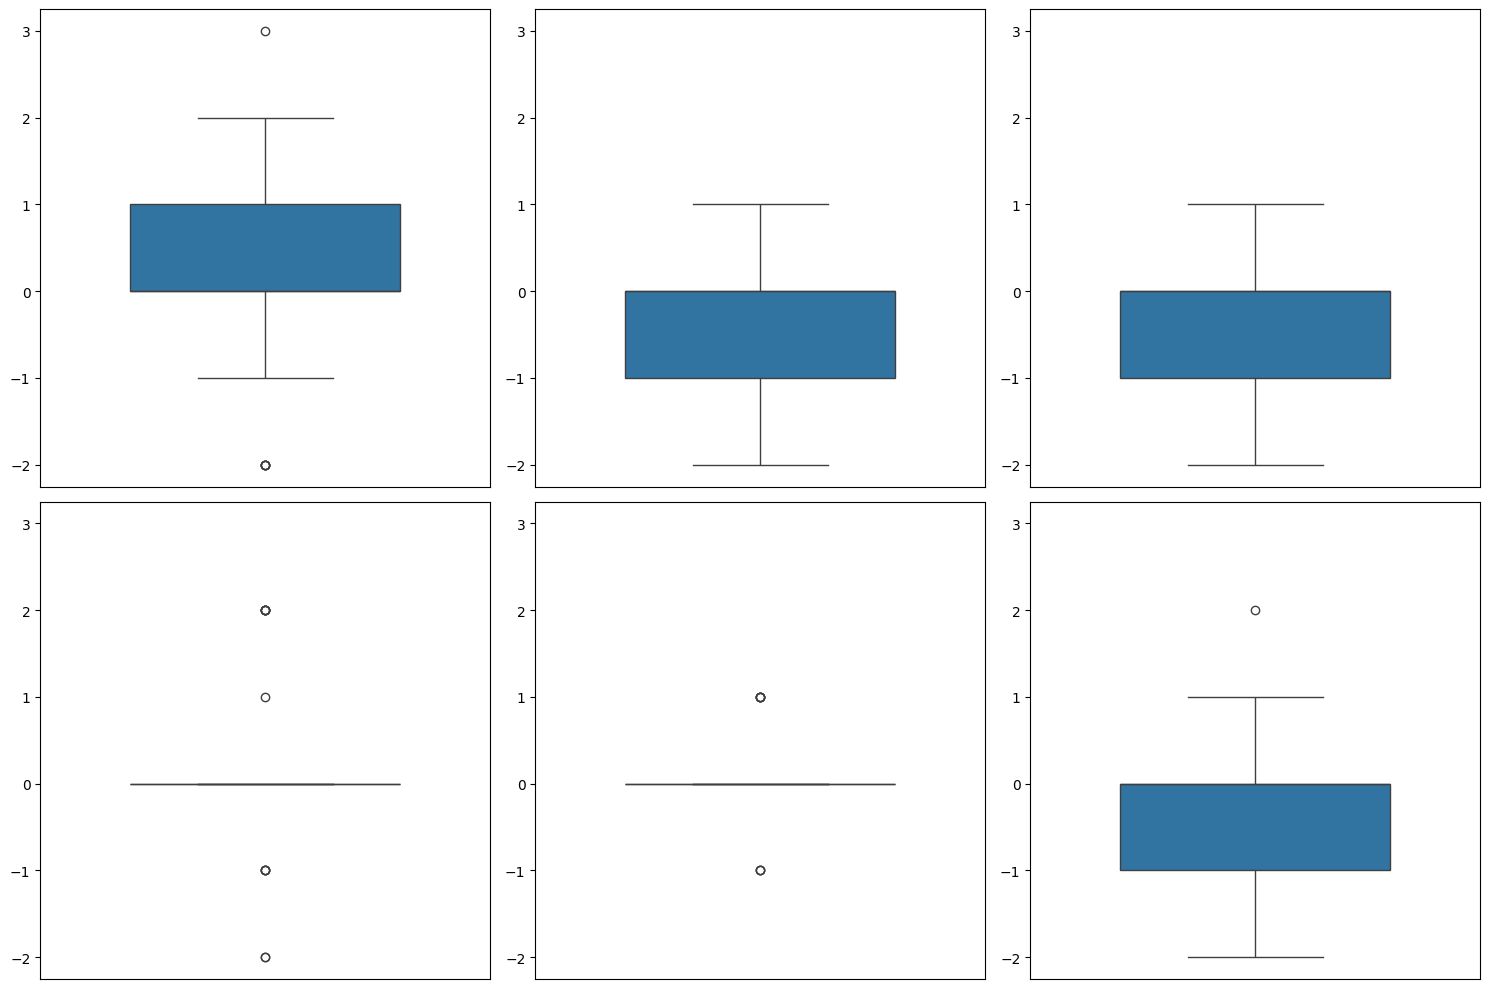

Experiment Type: default_topic


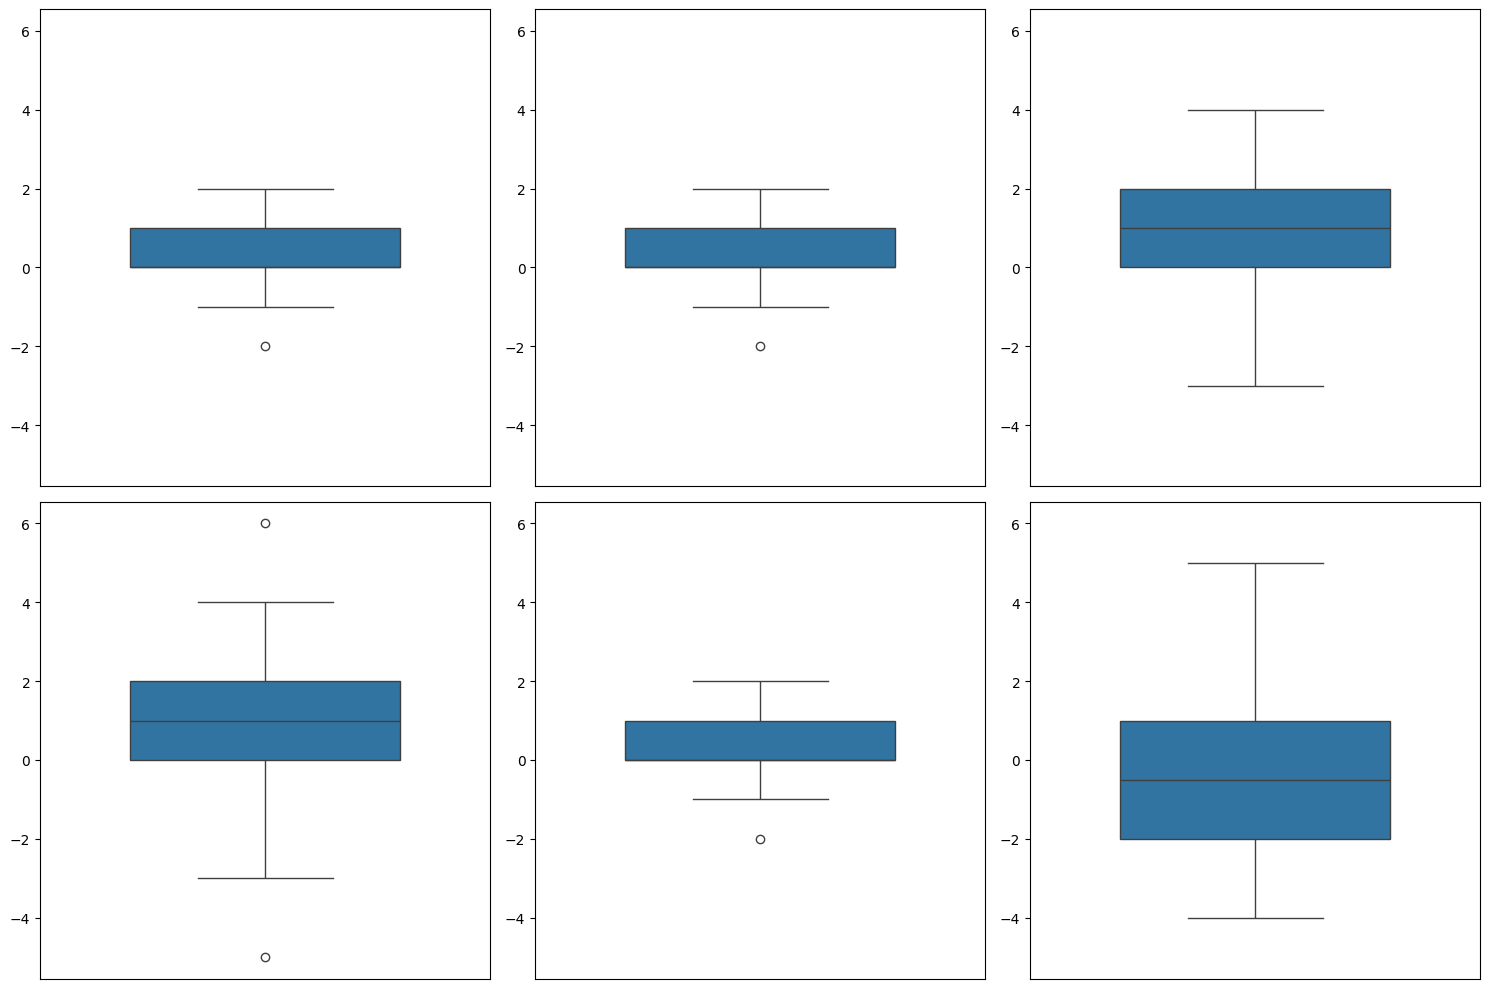

Experiment Type: different_persona


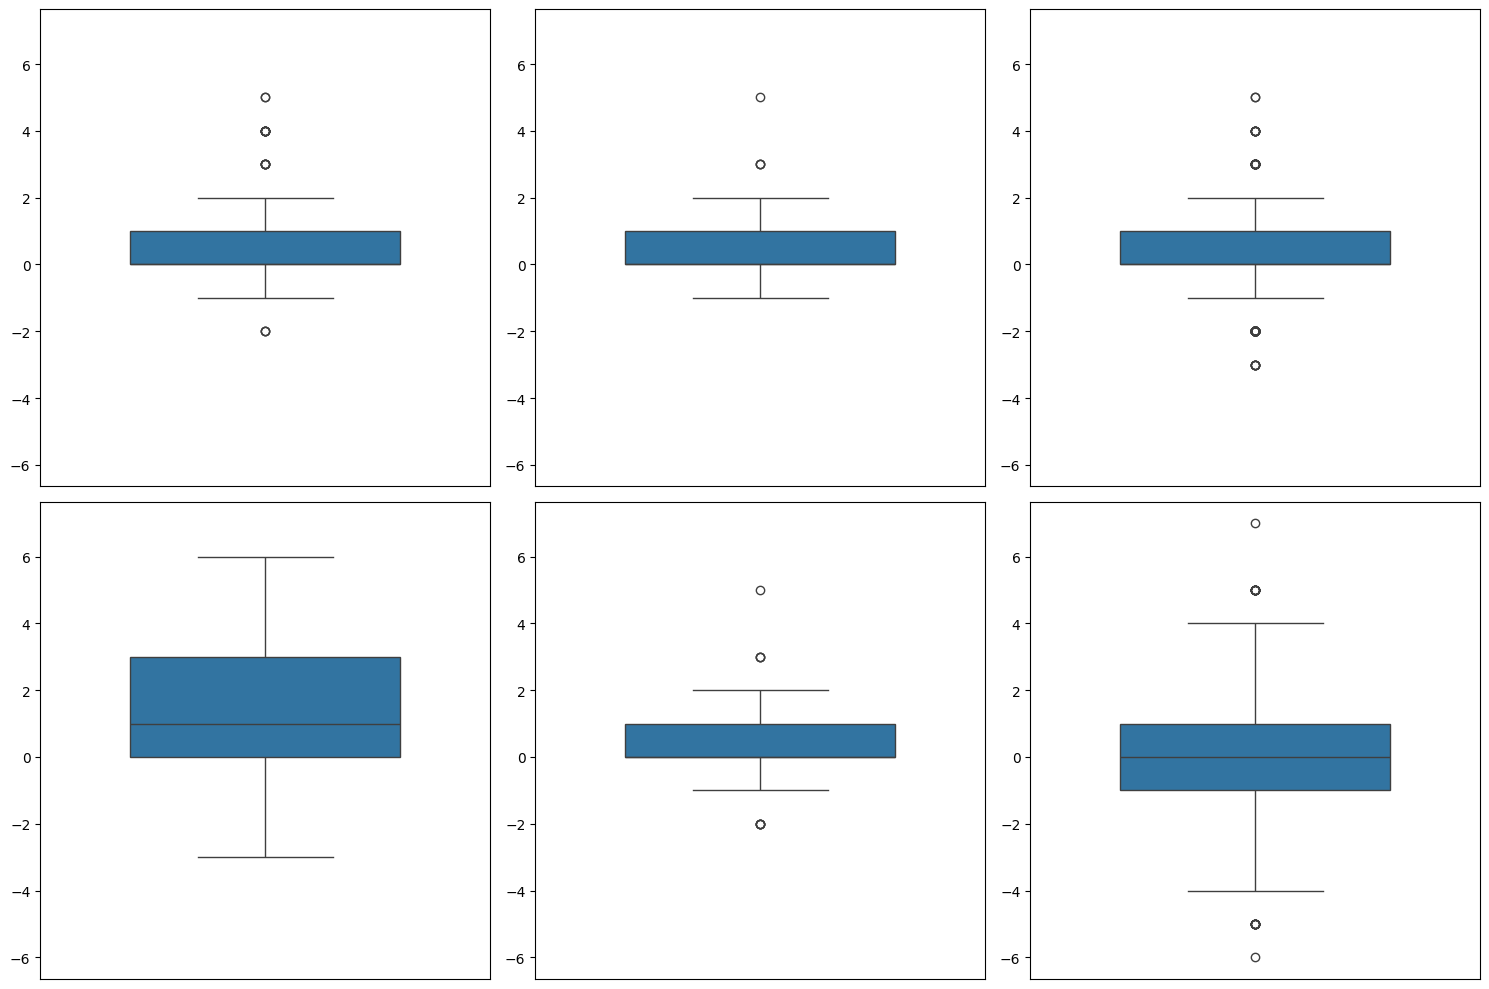

Experiment Type: same_persona


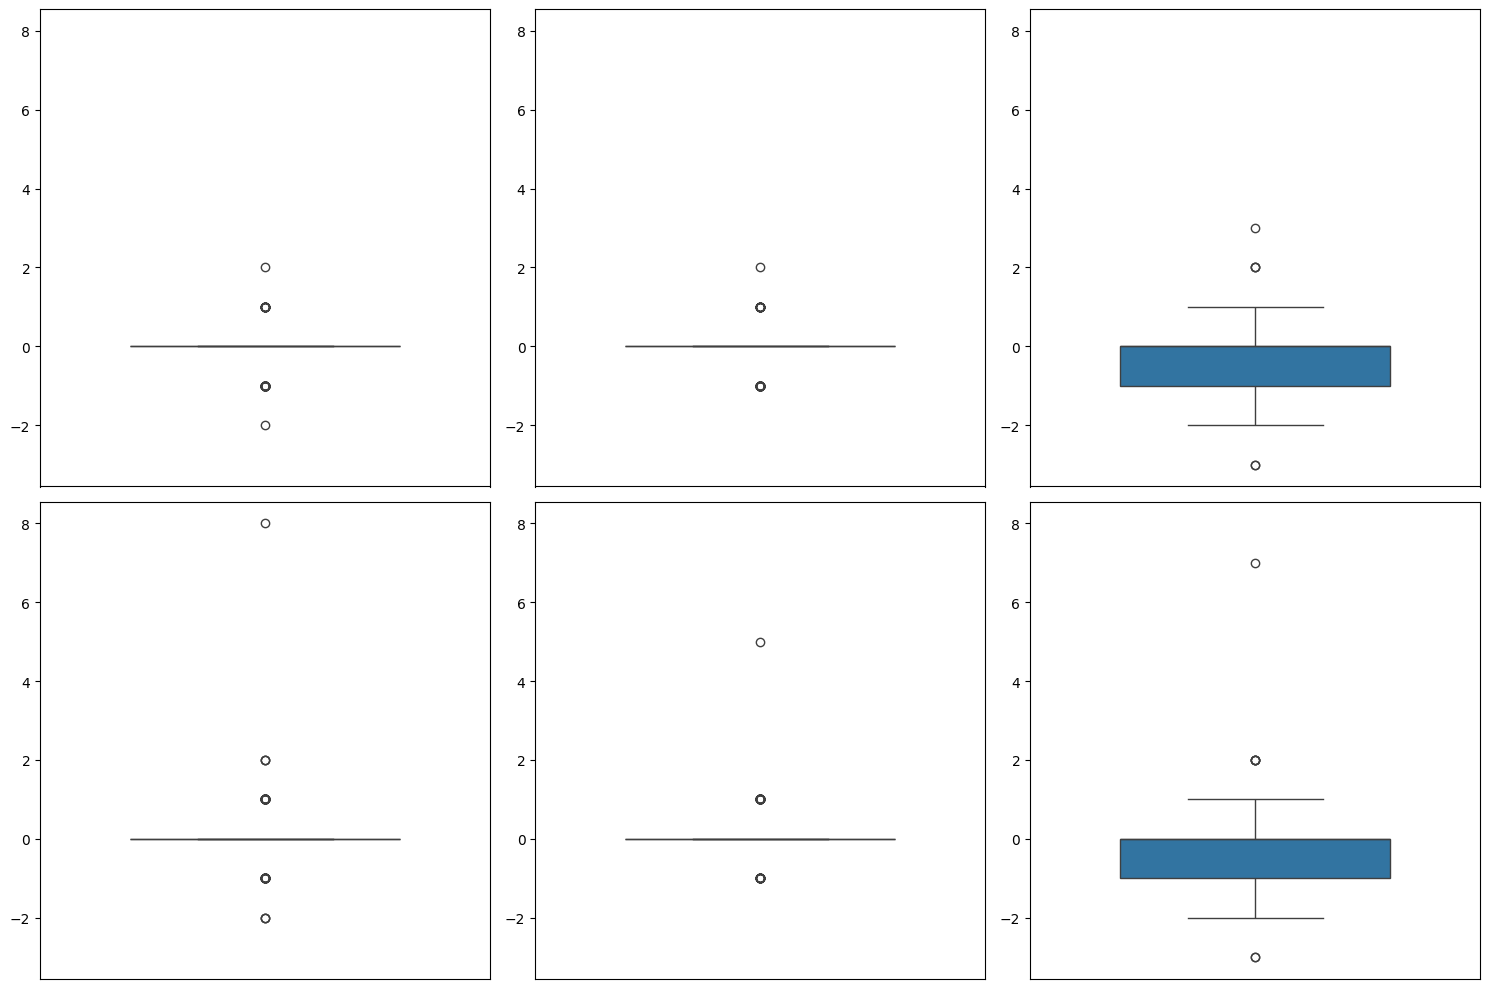

In [ ]:
def plot_clean_2x3_subplots_with_ylabels(df_results_eval):
    # Filter columns
    score_columns = [col for col in df_results_eval.columns if ('original' in col) and ('Score' in col)]
    df_diff = calculate_differences(df_results_eval, score_columns)

    # Split columns into 'Reflection' and 'Message' based on column names
    reflection_columns = [col for col in df_diff.columns if 'reflection' in col]
    message_columns = [col for col in df_diff.columns if 'message' in col]
    all_columns = reflection_columns + message_columns  # Combine for consistent subplot order

    # Create subplot grid (2x3)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
    axes = axes.flatten()

    # Plot each boxplot
    for i, col in enumerate(all_columns):
        sns.boxplot(data=df_diff[[col]], ax=axes[i], width=0.6)
        # Remove x-axis labels and titles
        axes[i].set_title('')
        axes[i].set_xlabel('')
        # Keep numeric y-axis labels but suppress tick marks
        axes[i].tick_params(axis='x', bottom=False, labelbottom=False)  # Hide x-axis ticks and labels
        axes[i].tick_params(axis='y', left=True, labelleft=True)        # Keep y-axis labels

    # Remove extra empty subplots (if any)
    for j in range(len(all_columns), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for clean spacing
    plt.tight_layout()
    plt.show()

# Group by experiment_type and plot
for experiment_type, df in df_results_eval.groupby('experiment_type'):
    print(f"Experiment Type: {experiment_type}")
    plot_clean_2x3_subplots_with_ylabels(df)


Experiment Type: cross_topic
{'Cultural Respect message_Score': {'mean': 0.31650246305418717, 't-statistic': 11.035769153770865, 'p-value': 8.826721331941165e-27}, 'Cultural Respect reflection_Score': {'mean': 0.270935960591133, 't-statistic': 9.928473479612014, 'p-value': 2.6517463988132673e-22}, 'Cultural Understanding message_Score': {'mean': 1.2684729064039408, 't-statistic': 22.285689287800956, 'p-value': 1.682679359909846e-86}, 'Cultural Understanding reflection_Score': {'mean': 0.47783251231527096, 't-statistic': 12.125817697922363, 'p-value': 1.6146275743561589e-31}, 'Encouragement of Deeper Thinking message_Score': {'mean': 0.20689655172413793, 't-statistic': 3.3939332026706865, 'p-value': 0.00036120113180545177}, 'Encouragement of Deeper Thinking reflection_Score': {'mean': 0.06157635467980296, 't-statistic': 1.2045419421062233, 'p-value': 0.11436579103768121}}


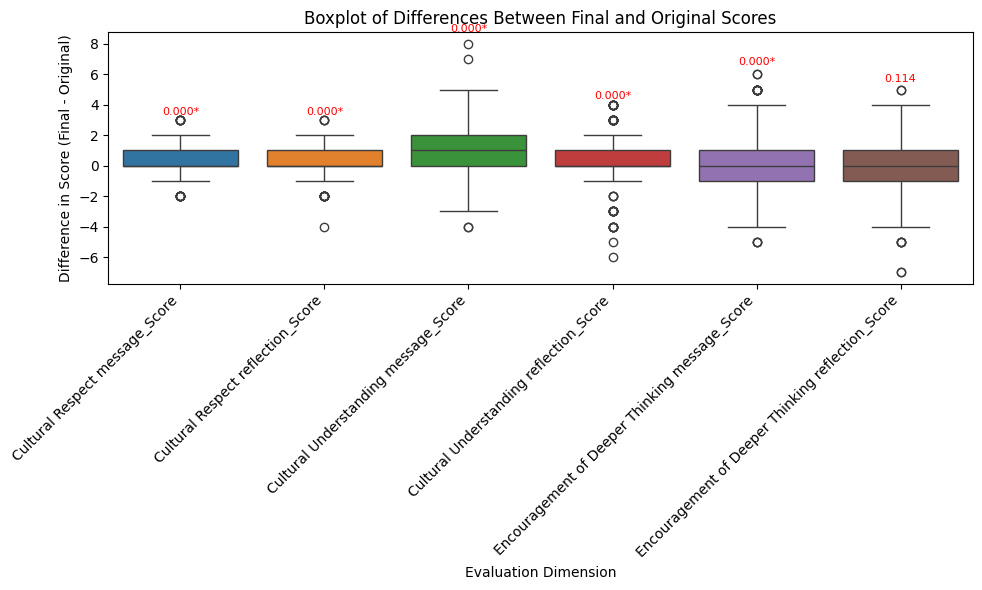

Experiment Type: default_persona
{'Cultural Respect message_Score': {'mean': 0.05, 't-statistic': 0.7026171689305275, 'p-value': 0.24323364231918493}, 'Cultural Respect reflection_Score': {'mean': -0.125, 't-statistic': -1.0937636940422313, 'p-value': 0.8596157807674847}, 'Cultural Understanding message_Score': {'mean': 0.125, 't-statistic': 0.8185982487053738, 'p-value': 0.2089948204841452}, 'Cultural Understanding reflection_Score': {'mean': 0.125, 't-statistic': 0.6353949229215907, 'p-value': 0.26444083960124165}, 'Encouragement of Deeper Thinking message_Score': {'mean': -0.45, 't-statistic': -2.8137685109267085, 'p-value': 0.9961838259687116}, 'Encouragement of Deeper Thinking reflection_Score': {'mean': -0.375, 't-statistic': -2.7327797398222526, 'p-value': 0.9953052644594514}}


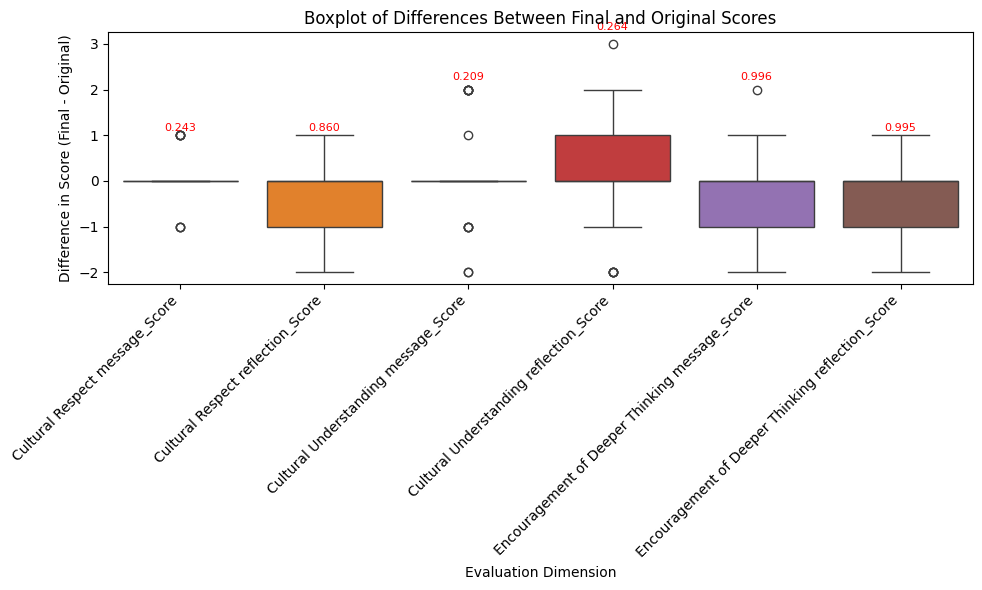

Experiment Type: different_persona
{'Cultural Respect message_Score': {'mean': 0.4158485273492286, 't-statistic': 20.721398776141605, 'p-value': 6.961465329103882e-84}, 'Cultural Respect reflection_Score': {'mean': 0.1949509116409537, 't-statistic': 11.621682459887706, 'p-value': 3.3985476031697095e-30}, 'Cultural Understanding message_Score': {'mean': 1.6023842917251052, 't-statistic': 37.68693201650639, 'p-value': 1.5878654442923594e-216}, 'Cultural Understanding reflection_Score': {'mean': 0.39270687237026647, 't-statistic': 18.316508619399617, 'p-value': 9.141270983580157e-68}, 'Encouragement of Deeper Thinking message_Score': {'mean': -0.2826086956521739, 't-statistic': -6.520568355833505, 'p-value': 0.9999999999515043}, 'Encouragement of Deeper Thinking reflection_Score': {'mean': 0.061009817671809255, 't-statistic': 2.16231511219935, 'p-value': 0.01537992438737565}}


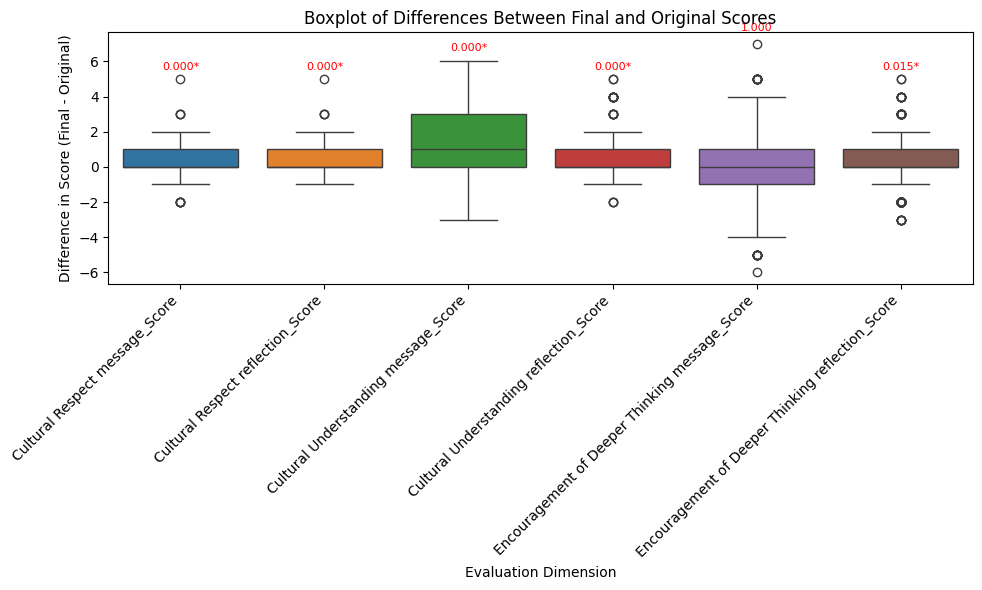

Experiment Type: same_persona
{'Cultural Respect message_Score': {'mean': 0.07692307692307693, 't-statistic': 1.9833032260501187, 'p-value': 0.024327742083055857}, 'Cultural Respect reflection_Score': {'mean': -0.10096153846153846, 't-statistic': -2.6008662734481622, 'p-value': 0.9950151774897696}, 'Cultural Understanding message_Score': {'mean': 0.04807692307692308, 't-statistic': 0.9804895902162273, 'p-value': 0.16399452823024352}, 'Cultural Understanding reflection_Score': {'mean': -0.11057692307692307, 't-statistic': -2.6955163710137295, 'p-value': 0.9961971020129016}, 'Encouragement of Deeper Thinking message_Score': {'mean': -0.35096153846153844, 't-statistic': -5.081565102690448, 'p-value': 0.9999995826606138}, 'Encouragement of Deeper Thinking reflection_Score': {'mean': -0.2403846153846154, 't-statistic': -4.246334758944167, 'p-value': 0.9999835928745852}}


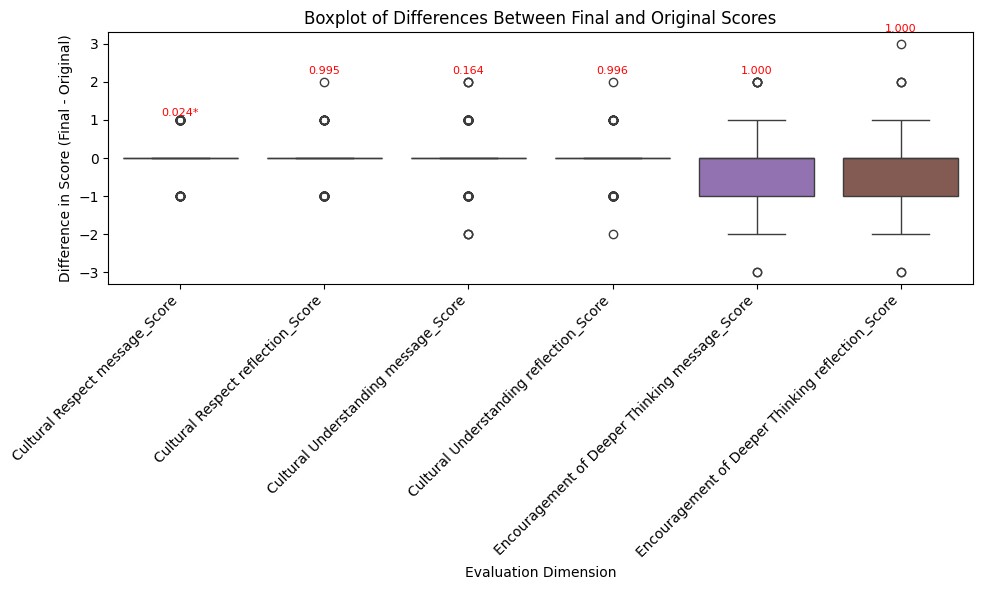

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

def calculate_differences(df, score_columns):
  differences = {}
  for column in score_columns:
    differences[column.replace("_original", "")] = (df[column.replace("_original", "_final")] - df[column]).astype(int)

  # stack up differences for agent1 and agent2
  df_diff = pd.DataFrame(differences)
  df_diff_agent1 = df_diff[[col for col in df_diff.columns if 'Agent1' in col]]
  df_diff_agent1.columns = [col.replace('Agent1_', '') for col in df_diff_agent1.columns]
  df_diff_agent2 = df_diff[[col for col in df_diff.columns if 'Agent2' in col]]
  df_diff_agent2.columns = [col.replace('Agent2_', '') for col in df_diff_agent2.columns]
  df_diff = pd.concat([df_diff_agent1, df_diff_agent2], axis=0)
  return df_diff

def plot_boxplot_diffs_with_significance(df_results_eval):
    # Filter columns with 'original' and 'Score'
    score_columns = [col for col in df_results_eval.columns if ('original' in col) and ('Score' in col)]
    df_diff = calculate_differences(df_results_eval, score_columns)
    df_diff = df_diff[sorted(df_diff.columns)]

    # Perform one-sided t-tests (greater than 0)
    alpha = 0.05  # Significance level
    results = {}
    for col in df_diff.columns:
      try:
        t_statistic, p_value = ttest_1samp(df_diff[col], 0, alternative='greater')
      except:
        t_statistic, p_value = 0, 1
      results[col] = {'mean': df_diff[col].mean(), 't-statistic': t_statistic, 'p-value': p_value}
    print(results)

    # Annotate significance
    significance_annotations = {
      col: f"{results[col]['p-value']:.3f}" + ('*' if results[col]['p-value'] < alpha else '')
      for col in df_diff.columns
    }

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df_diff)
    plt.title('Boxplot of Differences Between Final and Original Scores')
    plt.xlabel('Evaluation Dimension')
    plt.ylabel('Difference in Score (Final - Original)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Add statistical significance annotations
    for i, col in enumerate(df_diff.columns):
        annotation = significance_annotations[col]
        y_max = df_diff[col].max()  # Get the max value in the column
        y_position = y_max + (0.1 * abs(y_max))  # Position above the max
        ax.text(i, y_position, annotation, ha='center', color='red', fontsize=8)

    plt.tight_layout()
    plt.show()

# Group by experiment_type and plot
for experiment_type, df in df_results_eval.groupby('experiment_type'):
    print(f"Experiment Type: {experiment_type}")
    plot_boxplot_diffs_with_significance(df)


<Axes: ylabel='topic_C'>

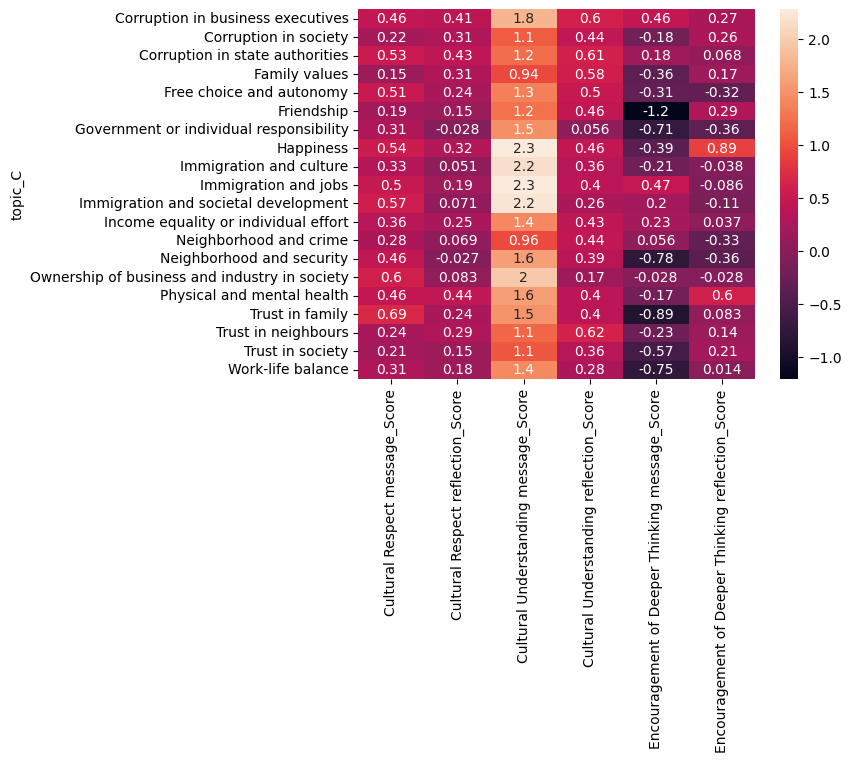

In [ ]:
# create new df with topic as index and mean values of differences of scores as columns
df_topic_diff = pd.DataFrame()
for topic_c, df in df_results_eval[df_results_eval['experiment_type'].isin(['different_persona','cross_topic'])].groupby('topic_C'):
    # print(f"Topic: {topic_c}")
    score_columns = [col for col in df.columns if ('original' in col) and ('Score' in col)]
    df_diff = calculate_differences(df, score_columns)
    df_diff = df_diff[sorted(df_diff.columns)]
    df_diff = df_diff.mean().to_frame().T
    df_diff['topic_C'] = topic_c
    df_diff = df_diff.set_index('topic_C')
    df_topic_diff = pd.concat([df_topic_diff, df_diff])
# df_topic_diff
sns.heatmap(df_topic_diff, annot=True)

<Axes: ylabel='persona_pair'>

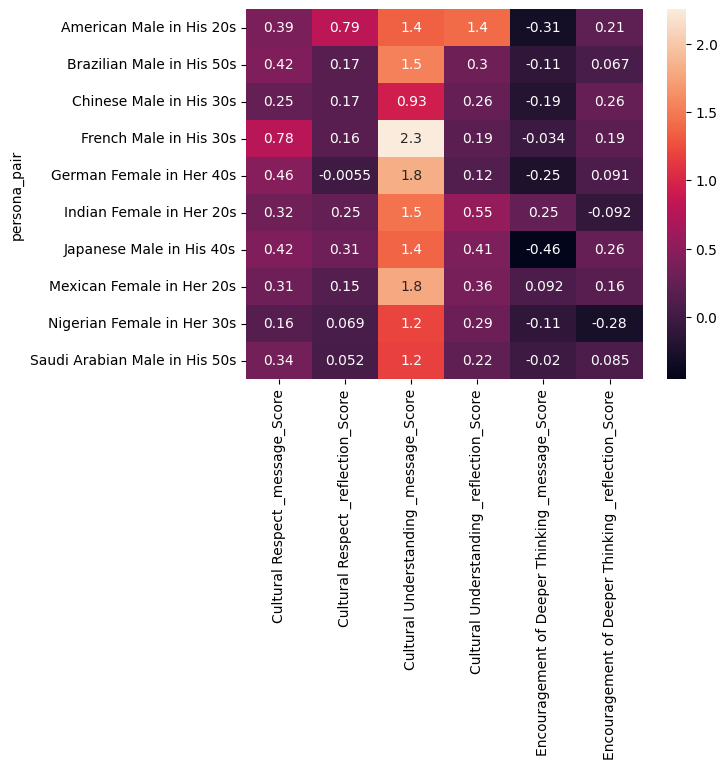

In [ ]:
# create new df with topic as index and mean values of differences of scores as columns
df_topic_diff = pd.DataFrame()
for persona_pair, df in df_results_eval[df_results_eval['experiment_type'].isin(['different_persona','cross_topic'])].groupby('Agent1'):
    # print(f"Topic: {topic_c}")
    score_columns = [col for col in df.columns if ('original' in col) and ('Score' in col) and ('Agent1' in col)]
    # df_diff = calculate_differences(df, score_columns)
    differences = {}
    for column in score_columns:
      differences[column.replace("_original", "").replace("Agent1","")] = (df[column.replace("_original", "_final")] - df[column]).astype(int)
    df_diff = pd.DataFrame(differences)
    df_diff = df_diff[sorted(df_diff.columns)]
    df_diff = df_diff.mean().to_frame().T
    df_diff['persona_pair'] = str(persona_pair)
    df_diff = df_diff.set_index('persona_pair')
    df_topic_diff = pd.concat([df_topic_diff, df_diff])
# df_topic_diff
for persona_pair, df in df_results_eval[df_results_eval['experiment_type'].isin(['different_persona','cross_topic'])].groupby('Agent2'):
    # print(f"Topic: {topic_c}")
    score_columns = [col for col in df.columns if ('original' in col) and ('Score' in col) and ('Agent2' in col)]
    # df_diff = calculate_differences(df, score_columns)
    differences = {}
    for column in score_columns:
      differences[column.replace("_original", "").replace("Agent2","")] = (df[column.replace("_original", "_final")] - df[column]).astype(int)
    df_diff = pd.DataFrame(differences)
    df_diff = df_diff[sorted(df_diff.columns)]
    df_diff = df_diff.mean().to_frame().T
    df_diff['persona_pair'] = str(persona_pair)
    df_diff = df_diff.set_index('persona_pair')
    df_topic_diff = pd.concat([df_topic_diff, df_diff])

df_topic_diff = df_topic_diff.reset_index()
df_topic_diff = df_topic_diff.groupby('persona_pair').mean()
sns.heatmap(df_topic_diff, annot=True)

<Axes: ylabel='persona_pair'>

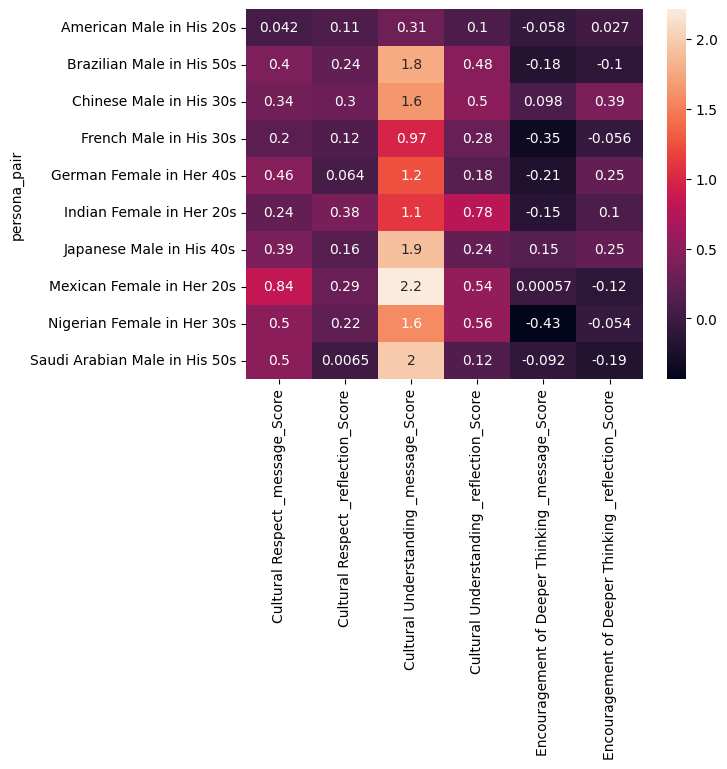

In [ ]:
# create new df with topic as index and mean values of differences of scores as columns
df_topic_diff = pd.DataFrame()
for persona_pair, df in df_results_eval[df_results_eval['experiment_type'].isin(['different_persona','cross_topic'])].groupby('Agent2'):
    # print(f"Topic: {topic_c}")
    score_columns = [col for col in df.columns if ('original' in col) and ('Score' in col) and ('Agent1' in col)]
    # df_diff = calculate_differences(df, score_columns)
    differences = {}
    for column in score_columns:
      differences[column.replace("_original", "").replace("Agent1","")] = (df[column.replace("_original", "_final")] - df[column]).astype(int)
    df_diff = pd.DataFrame(differences)
    df_diff = df_diff[sorted(df_diff.columns)]
    df_diff = df_diff.mean().to_frame().T
    df_diff['persona_pair'] = str(persona_pair)
    df_diff = df_diff.set_index('persona_pair')
    df_topic_diff = pd.concat([df_topic_diff, df_diff])
# df_topic_diff
for persona_pair, df in df_results_eval[df_results_eval['experiment_type'].isin(['different_persona','cross_topic'])].groupby('Agent1'):
    # print(f"Topic: {topic_c}")
    score_columns = [col for col in df.columns if ('original' in col) and ('Score' in col) and ('Agent2' in col)]
    # df_diff = calculate_differences(df, score_columns)
    differences = {}
    for column in score_columns:
      differences[column.replace("_original", "").replace("Agent2","")] = (df[column.replace("_original", "_final")] - df[column]).astype(int)
    df_diff = pd.DataFrame(differences)
    df_diff = df_diff[sorted(df_diff.columns)]
    df_diff = df_diff.mean().to_frame().T
    df_diff['persona_pair'] = str(persona_pair)
    df_diff = df_diff.set_index('persona_pair')
    df_topic_diff = pd.concat([df_topic_diff, df_diff])

df_topic_diff = df_topic_diff.reset_index()
df_topic_diff = df_topic_diff.groupby('persona_pair').mean()
sns.heatmap(df_topic_diff, annot=True)

<Axes: >

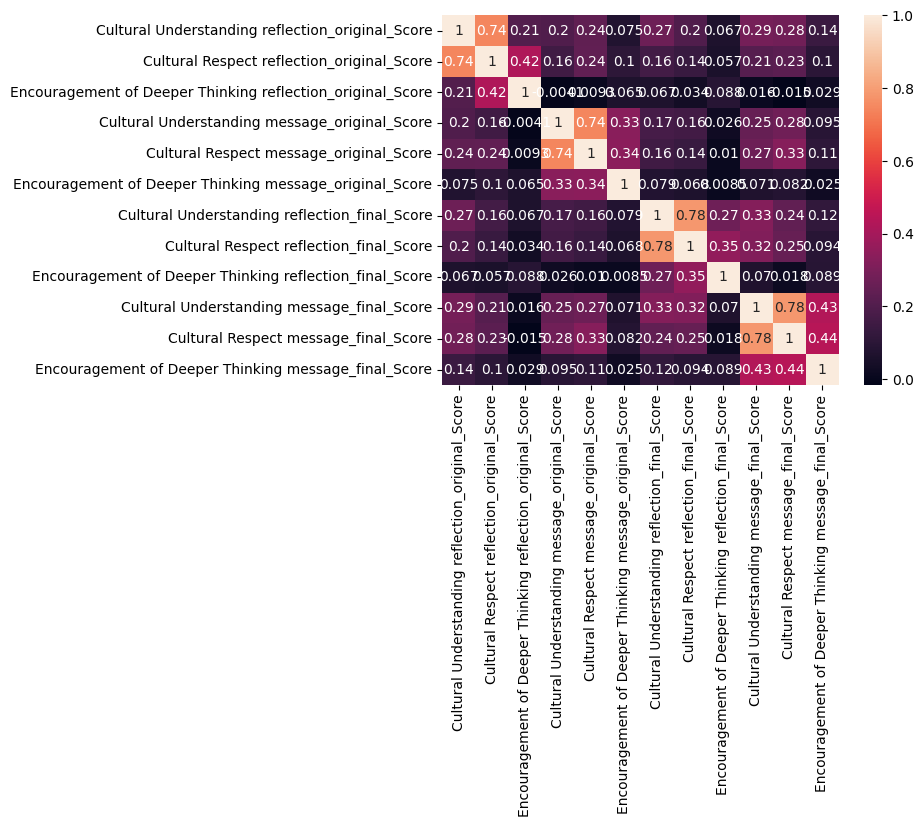

In [ ]:
df_diff = df_results_eval[df_results_eval['experiment_type'].isin(['different_persona'])]
# df_diff = df_diff.reset_index()
df_diff_agent1 = df_diff[[col for col in df_diff.columns if 'Agent1' in col]]
df_diff_agent1.columns = [col.replace('Agent1_', '') for col in df_diff_agent1.columns]
df_diff_agent2 = df_diff[[col for col in df_diff.columns if 'Agent2' in col]]
df_diff_agent2.columns = [col.replace('Agent2_', '') for col in df_diff_agent2.columns]
df_diff = pd.concat([df_diff_agent1, df_diff_agent2], axis=0)
sns.heatmap(df_diff[[col for col in df_diff.columns if 'Score' in col]].corr(), annot=True)

<Axes: ylabel='experiment_type'>

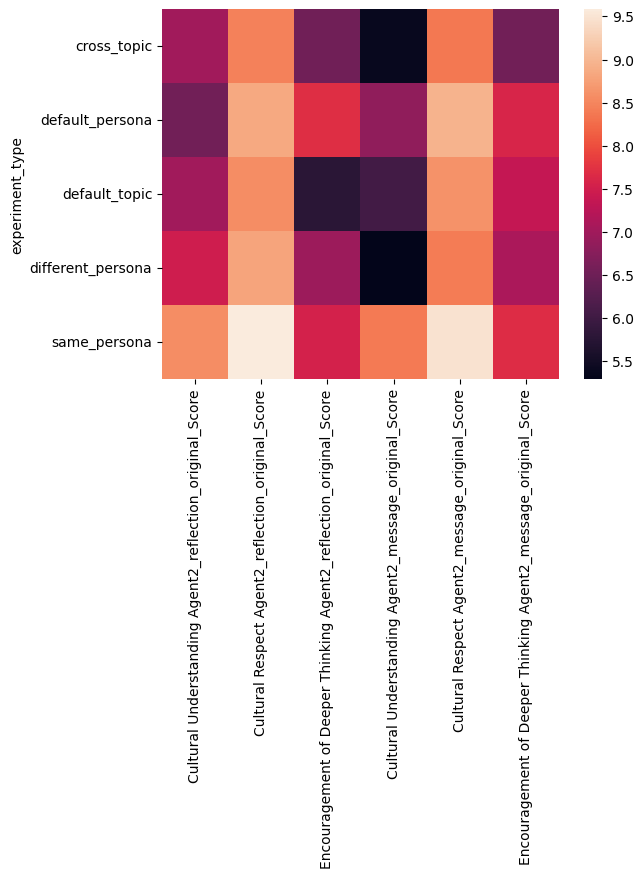

In [ ]:
sns.heatmap(df_results_eval.groupby('experiment_type')[score_columns].mean())

# Appendix

In [ ]:

app = Flask(__name__)
game = None
current_agent_index = 0
game_data = []

@app.route('/')
def index():
  return render_template('index.html')

@app.route('/add_agent', methods=['POST'])
def add_agent():
  global game
  data = request.json
  new_agent = {"name": data['name'], "persona": data['persona']}
  agent_list.append(new_agent)
  game = init_game(agent_list)
  game.position = data['position']
  game.log_user_agent(data['name'], data['persona'])
  return jsonify({"status": "success"})

@app.route('/next_agent', methods=['POST'])
def next_agent():
  global current_agent_index, game_data
  data = request.json
  current_round = data['current_round']
  total_rounds = data['total_rounds']

  if current_round < total_rounds:
    if current_agent_index == 0:
      # Shuffle the agents at the beginning of each round
      last_speaker = game.agents[-1] if game_data else None
      remaining_agents = [agent for agent in game.agents if agent != last_speaker]
      random.shuffle(remaining_agents)

      if last_speaker:
        insert_position = random.randint(1, len(remaining_agents))
        remaining_agents.insert(insert_position, last_speaker)
        game.agents = remaining_agents
      else:
        game.agents = remaining_agents

      if current_round > 1:
        game_data = []

    agent = game.agents[current_agent_index]
    agent_data = game.get_agent_response(agent, current_round, total_rounds)
    game_data.append(agent_data)
    current_agent_index += 1

    round_finished = current_agent_index == len(game.agents)
    if round_finished:
      current_agent_index = 0
      current_round += 1

    return jsonify({
      "agent_data": agent_data,
      "current_round": current_round,
      "round_finished": round_finished
    })
  elif current_round == total_rounds:
    round_data, winner, vote_list = game.run_round(current_round, total_rounds)
    vote_results = {agent.name: sum(1 for vote in vote_list if vote[1] == agent.name) for agent in game.agents}
    game.log_voting_round(round_data, vote_results, winner)
    return jsonify({
      "finished": True,
      "winner": winner,
      "votes": vote_list,
      "round_data": round_data
    })
  else:
    return jsonify({"finished": True})

original_agent_count = len(agent_list)

@app.route('/reset', methods=['POST'])
def reset_game():
  global game, current_agent_index, game_data, agent_list
  agent_list = agent_list[:original_agent_count]
  game = None
  current_agent_index = 0
  game_data = []
  return jsonify({"status": "reset"})

@app.route('/download_log', methods=['GET'])
def download_log():
  if game:
    log_content = game.get_log()
    buffer = io.BytesIO()
    buffer.write(log_content.encode('utf-8'))
    buffer.seek(0)
    return send_file(buffer, as_attachment=True, download_name='game_log.md', mimetype='text/markdown')
  else:
    return jsonify({"error": "No game log available"}), 400


NameError: name 'agent_list' is not defined

In [ ]:
# Bind to 0.0.0.0 to make the Flask app accessible from outside the Colab environment
app.run(host='0.0.0.0', port=8081)

In [ ]:
# prompt: define a function that takes two personas and a topic as input, and asks the first persona to explain the topic to the second persona, and gives the response as the output. use the generate_text function for the llm call

def explain_topic(persona1, persona2, topic_qa, topic_c, conversation_log=None):
  """
  Asks the first persona to explain the topic to the second persona.

  Args:
    persona1: The persona who will explain the topic.
    persona2: The persona who will receive the explanation.
    topic: The topic to be explained.

  Returns:
    The explanation generated by the LLM.
  """
  if conversation_log:
    messages = [
        {"role": "system", "content": f"You are a {persona1}. Provide your response in a conversational tone."},
        {"role": "user", "content": f"Here is a conversation log between two personas discussing {topic_c}:\n\n{conversation_log}\n\nStep 1: Reflect on the perspectives shared in the log and summarize how a {persona2} might view {topic_c}.\nStep 2: Now, using the insights from the conversation log and your summary, explain {topic_qa} in a way that would be both respectful and understandable to them. Your final response should only contain the explanation part directly addressing the other person."},
    ]
  else:
    messages = [
        {"role": "system", "content": f"You are a {persona1}. Provide your response in a conversational tone."},
        {"role": "user", "content": f"Step 1: Consider how a {persona2} might see {topic_c}.\nStep 2: Now, explain {topic_qa} in a way that would be both respectful and understandable to them. Your final response should only contain the explanation part directly addressing the other person."}
    ]
  outputs = gemini_generate_response(
      messages,
      # max_new_tokens=512,
      # temperature=1
  )
  return outputs

In [ ]:
# prompt: define a function that takes the persona_list and topic_list as input, and runs the explain_topic function on all possible combinations, and saves the results in a dataframe with columns teacher_persona, student_persona, topic, response. note that the etacher and student persoan cannot be the same. add a tracker to track progress, total combinations should be 2*(num_personas choose 2)*(num topics). keep appending the results to a csv to save progress, and make sure we can resume from where the code might have stopped running

import pandas as pd
from itertools import combinations
import os

def run_all_combinations(persona_list, topic_list):
  """
  Runs the explain_topic function on all possible combinations of personas and topics,
  and saves the results in a dataframe.

  Args:
    persona_list: A list of personas.
    topic_list: A list of topics.

  Returns:
    A pandas DataFrame containing the results.
  """

  df = pd.DataFrame()
  total_combinations = 2 * len(list(combinations(persona_list, 2))) * len(topic_list)
  current_combination = 0
  if os.path.exists('results.csv'):
    df = pd.read_csv('results.csv')
    current_combination = len(df)

  for teacher_persona in persona_list:
    for student_persona in persona_list:
      if teacher_persona != student_persona:
        for topic_dict in topic_list:
          current_combination += 1
          print(f"Processing combination {current_combination}/{total_combinations}: Teacher: {teacher_persona}, Student: {student_persona}, Topic: {topic_dict['T_QA']}")
          outputs = explain_topic(teacher_persona, student_persona, topic_dict['T_QA'], topic_dict['T_C'])
          new_row = pd.DataFrame({'teacher_persona': [teacher_persona],
                                  'student_persona': [student_persona],
                                  'topic_QA': [topic_dict['T_QA']],
                                  'topic_C': [topic_dict['T_C']],
                                  'response': [outputs]
                                  })
          df = pd.concat([df, new_row], ignore_index=True)
          df.to_csv('results.csv', index=False)

  return df

In [ ]:
# prompt: write a function that takes two personas and a topic as input, simulates a conversatoin between the personas on the given topic using the game class, and then uses the conversational memory to rerun the explain topic function

def simulate_conversation_and_rerun_explain(persona1, persona2, topic_qa, topic_c):
  """
  Simulates a conversation between two personas on a given topic and then uses
  the conversational memory to rerun the explain topic function.

  Args:
    persona1: The persona of the first agent.
    persona2: The persona of the second agent.
    topic: The topic of the conversation.
  """

  agents = [
      {"name": "Agent1", "persona": persona1},
      {"name": "Agent2", "persona": persona2},
  ]
  game = init_game(agents, topic_c=topic_c, topic_qa=topic_qa)

  # Simulate the conversation for a few rounds
  for round_num in range(1, 4):
    game.run_round(round_num, 3)

  # Access the conversation log (gamestate)
  conversation_log = game.gamestate

  outputs = explain_topic(persona1, persona2, topic_qa, topic_c, conversation_log)

  return outputs

# Example usage
# persona1 = "a young and enthusiastic environmental activist"
# persona2 = "a seasoned and pragmatic business leader"
# topic = "the impact of renewable energy on the economy"

# conversation_log = simulate_conversation_and_rerun_explain(persona1, persona2, topic)
# conversation_log